# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1560]:
# %pip install --upgrade plotly

### Import Statements

In [1561]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [1562]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [1563]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [1564]:
print(f"The shape is {df_data.shape}. which means there are {df_data.shape[0]} rows and {df_data.shape[1]} columns")

The shape is (962, 16). which means there are 962 rows and 16 columns


In [1565]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [1566]:
print(f"The first Nobel price was awarded in {df_data.year.min()}")

The first Nobel price was awarded in 1901


In [1567]:
print(f"The lastest year included in the data set was {df_data.year.max()}")

The lastest year included in the data set was 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [1568]:
df_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
957    False
958    False
959    False
960    False
961    False
Length: 962, dtype: bool

In [1569]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [1570]:
df_data.isna()

year  category  prize  motivation  prize_share  laureate_type  \
0    False     False  False       False        False          False   
1    False     False  False       False        False          False   
2    False     False  False       False        False          False   
3    False     False  False        True        False          False   
4    False     False  False        True        False          False   
..     ...       ...    ...         ...          ...            ...   
957  False     False  False       False        False          False   
958  False     False  False       False        False          False   
959  False     False  False       False        False          False   
960  False     False  False       False        False          False   
961  False     False  False       False        False          False   

     full_name  birth_date  birth_city  birth_country  birth_country_current  \
0        False       False       False          False                  False   
1        False       False       False          False                  False   
2        False       False       False          False                  False   
3        False       False       False          False                  False   
4        False       False       False          False                  False   
..         ...         ...         ...            ...                    ...   
957      False       False        True          False                  False   
958      False        True        True           True                   True   
959      False       False       False          False                  False   
960      False       False       False          False                  False   
961      False       False       False          False                  False   

       sex  organization_name  organization_city  organization_country    ISO  
0    False              False              False                 False  False  
1    False               True               True                  True  False  
2    False              False              False                 False  False  
3    False               True               True                  True  False  
4    False               True               True                  True  False  
..     ...                ...                ...                   ...    ...  
957  False              False              False                 False  False  
958   True               True               True                  True   True  
959  False              False              False                 False  False  
960  False              False              False                 False  False  
961  False              False              False                 False  False  

[962 rows x 16 columns]

In [1571]:
df_data.isna().values.any()

True

In [1572]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [1573]:
col_subset = ['year','category', 'laureate_type',
            'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [1574]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

In [1575]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name','birth_city']
df_data.loc[df_data.birth_city.isna()][col_subset]

year    category laureate_type  \
24   1904       Peace  Organization   
60   1910       Peace  Organization   
89   1917       Peace  Organization   
200  1938       Peace  Organization   
215  1944       Peace  Organization   
237  1947       Peace  Organization   
238  1947       Peace  Organization   
283  1954       Peace  Organization   
348  1963       Peace  Organization   
349  1963       Peace  Organization   
366  1965       Peace  Organization   
399  1969       Peace  Organization   
479  1977       Peace  Organization   
523  1981       Peace  Organization   
558  1985       Peace  Organization   
588  1988       Peace  Organization   
659  1995       Peace  Organization   
682  1997       Peace  Organization   
703  1999       Peace  Organization   
725  2001  Literature    Individual   
730  2001       Peace  Organization   
778  2005       Peace  Organization   
788  2006       Peace  Organization   
801  2007       Peace  Organization   
837  2010       Peace    Individual   
860  2012       Peace  Organization   
873  2013       Peace  Organization   
897  2015       Peace  Organization   
919  2017       Peace  Organization   
957  2020    Medicine    Individual   
958  2020       Peace  Organization   

                                             full_name      organization_name  \
24   Institut de droit international (Institute of ...                    NaN   
60   Bureau international permanent de la Paix (Per...                    NaN   
89   Comité international de la Croix Rouge (Intern...                    NaN   
200  Office international Nansen pour les Réfugiés ...                    NaN   
215  Comité international de la Croix Rouge (Intern...                    NaN   
237   American Friends Service Committee (The Quakers)                    NaN   
238              Friends Service Council (The Quakers)                    NaN   
283  Office of the United Nations High Commissioner...                    NaN   
348  Comité international de la Croix Rouge (Intern...                    NaN   
349  Ligue des Sociétés de la Croix-Rouge (League o...                    NaN   
366            United Nations Children's Fund (UNICEF)                    NaN   
399         International Labour Organization (I.L.O.)                    NaN   
479                              Amnesty International                    NaN   
523  Office of the United Nations High Commissioner...                    NaN   
558  International Physicians for the Prevention of...                    NaN   
588                 United Nations Peacekeeping Forces                    NaN   
659   Pugwash Conferences on Science and World Affairs                    NaN   
682     International Campaign to Ban Landmines (ICBL)                    NaN   
703                           Médecins Sans Frontières                    NaN   
725                  Sir Vidiadhar Surajprasad Naipaul                    NaN   
730                              United Nations (U.N.)                    NaN   
778          International Atomic Energy Agency (IAEA)                    NaN   
788                                       Grameen Bank                    NaN   
801   Intergovernmental Panel on Climate Change (IPCC)                    NaN   
837                                         Liu Xiaobo                    NaN   
860                                European Union (EU)                    NaN   
873  Organisation for the Prohibition of Chemical W...                    NaN   
897                          National Dialogue Quartet                    NaN   
919  International Campaign to Abolish Nuclear Weap...                    NaN   
957                                   Michael Houghton  University of Alberta   
958                         World Food Programme (WFP)                    NaN   

    birth_city  
24         NaN  
60         NaN  
89         NaN  
200        NaN  
215        NaN  
237        NaN  
238        NaN  
283        NaN  
348       

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [1576]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [1577]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [1578]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

## 1) How many male and female are in each country that toke prices
## 2) Each year who were those that were younger that price given and what categories did fall in
## 3) From the analysis what is the predicted price be given to each category,city,sex,price,county,age,organization_name,organization_city,organization_country, etc.

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [1579]:
xx=df_data.sex[df_data["sex"]=="Male"].count()
yy=df_data.sex[df_data["sex"]=="Female"].count()
mf=df_data.sex.value_counts()
mf

Male      876
Female     58
Name: sex, dtype: int64

C:\Users\Deleo Anangfac\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



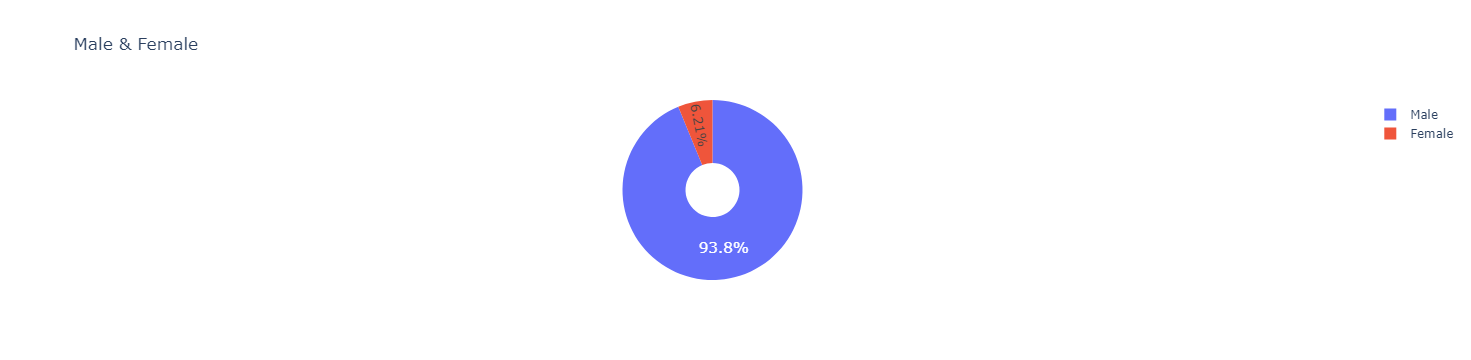

In [1580]:
fig=px.pie(labels=mf.index, values=mf.values, title="Male & Female", names=mf.index, hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=15)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [1581]:
first3=df_data[df_data["sex"]=="Female"]
first3.sort_values("year", ascending=True).full_name.head(3)

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [1582]:
first3=df_data[df_data["sex"]=="Female"]
first3.sort_values("year", ascending=True)[['full_name','prize']].head(3)

full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                                 prize  
18     The Nobel Prize in Physics 1903  
29          The Nobel Peace Prize 1905  
51  The Nobel Prize in Literature 1909

In [1583]:
first3=df_data[df_data["sex"]=="Female"]
first3.sort_values("year", ascending=True)[['full_name','birth_country','organization_name']].head(3)

full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                       birth_country organization_name  
18           Russian Empire (Poland)               NaN  
29  Austrian Empire (Czech Republic)               NaN  
51                            Sweden               NaN

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [1584]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
print(is_winner,"\n\n")
multiple_winners = df_data[is_winner]
print(multiple_winners,"\n\n")
print(f'There are {multiple_winners.full_name.nunique()} winners who were awarded the prize more than once.')

0      False
1      False
2      False
3      False
4      False
       ...  
957    False
958    False
959    False
960    False
961    False
Length: 962, dtype: bool 


     year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

  

In [1585]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [1586]:
df_data.category.nunique()

6

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64


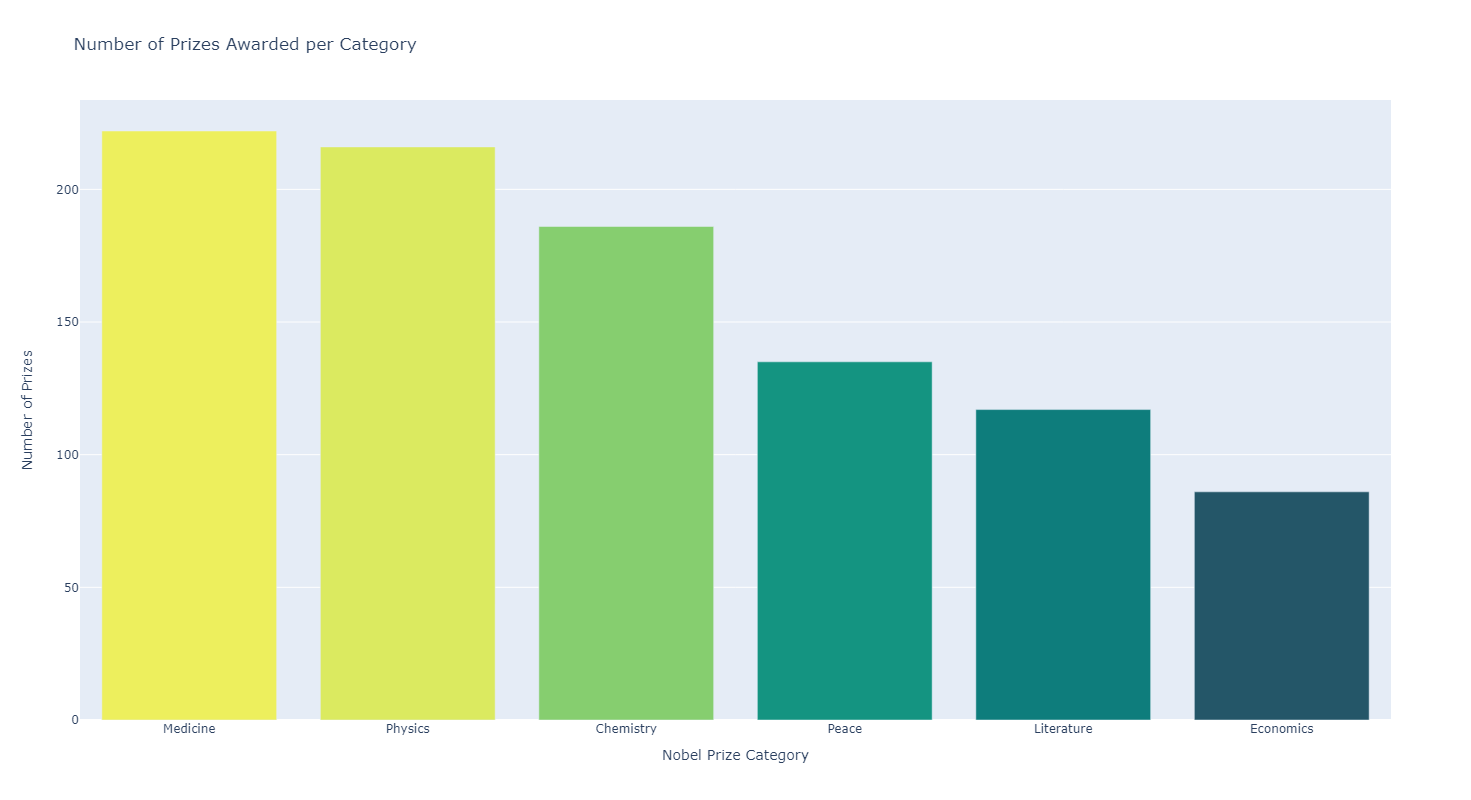

In [1587]:
cat = df_data.category.value_counts()
print(cat)
v_bar = px.bar(
        x = cat.index,
        y = cat.values,
        color = cat.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                coloraxis_showscale=False,
                width=1600, 
                height=800,
                yaxis_title='Number of Prizes')
v_bar.show()

In [1588]:
print(f"The category with fewer prize awarded was {df_data.category.value_counts().idxmin()} and that of the most prize awarded was {df_data.category.value_counts().idxmax()}.")

The category with fewer prize awarded was Economics and that of the most prize awarded was Medicine.


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [1589]:
firsteco=df_data.loc[(df_data['category']=='Economics')].sort_values("year").head(1)

In [1590]:
print(f"The first prize of Economy was given in {firsteco['year'].values[0]}")

The first prize of Economy was given in 1969


In [1591]:
print(f"The price was awarded to {firsteco['full_name'].values[0]}")

The price was awarded to Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64


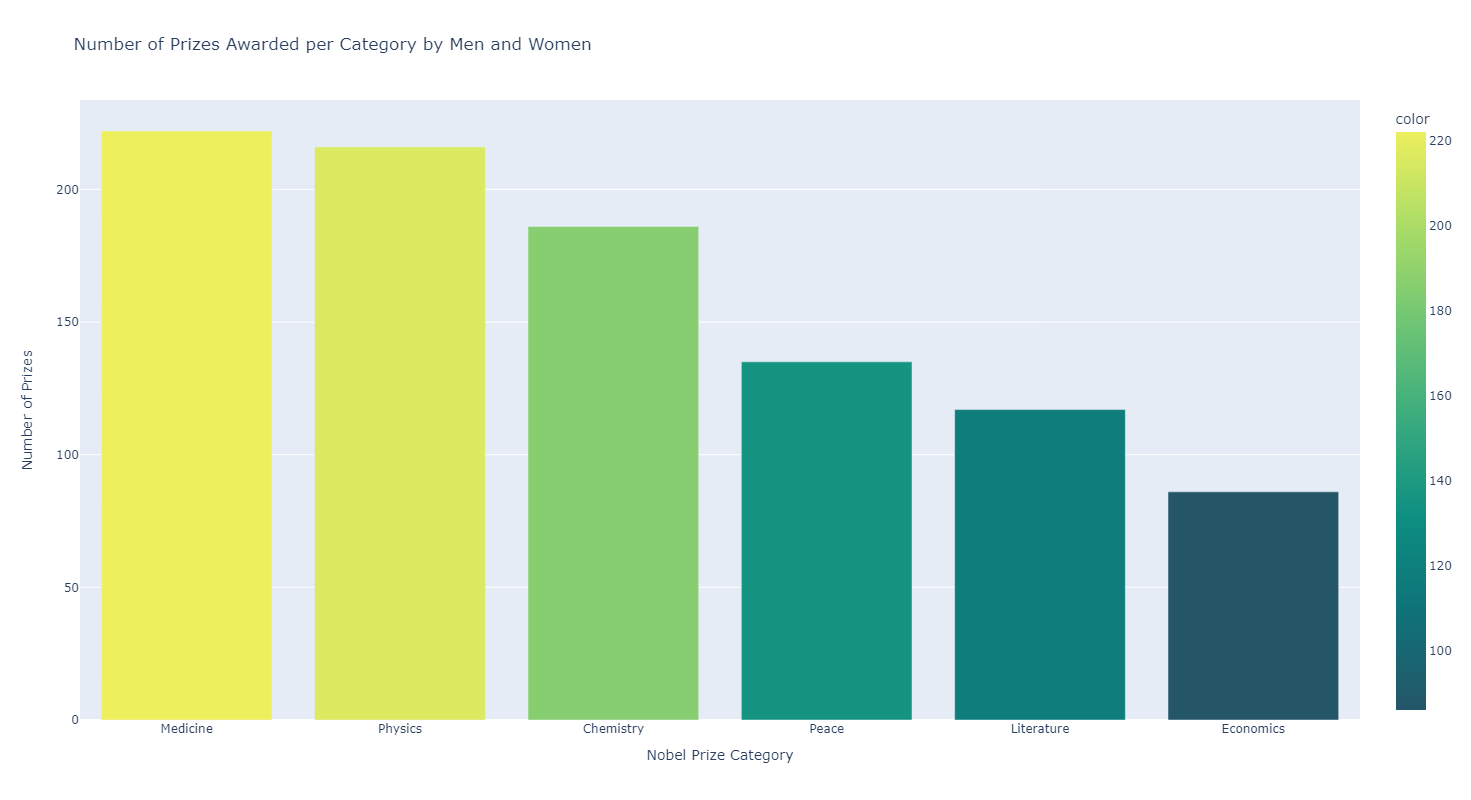

In [1592]:
cat = df_data.category.value_counts()
print(cat)
v_bar = px.bar(
        x = cat.index,
        y = cat.values,
        color = cat.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category by Men and Women')

v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                coloraxis_showscale=True,
                width=1600, 
                height=800,
                yaxis_title='Number of Prizes')
v_bar.show()

In [1593]:
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
print(cat_men_women,'\n\n\n')
cat_men_women.sort_values('prize', ascending=False, inplace=True)
print(cat_men_women)

      category     sex  prize
0    Chemistry  Female      7
1    Chemistry    Male    179
2    Economics  Female      2
3    Economics    Male     84
4   Literature  Female     16
5   Literature    Male    101
6     Medicine  Female     12
7     Medicine    Male    210
8        Peace  Female     17
9        Peace    Male     90
10     Physics  Female      4
11     Physics    Male    212 



      category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2


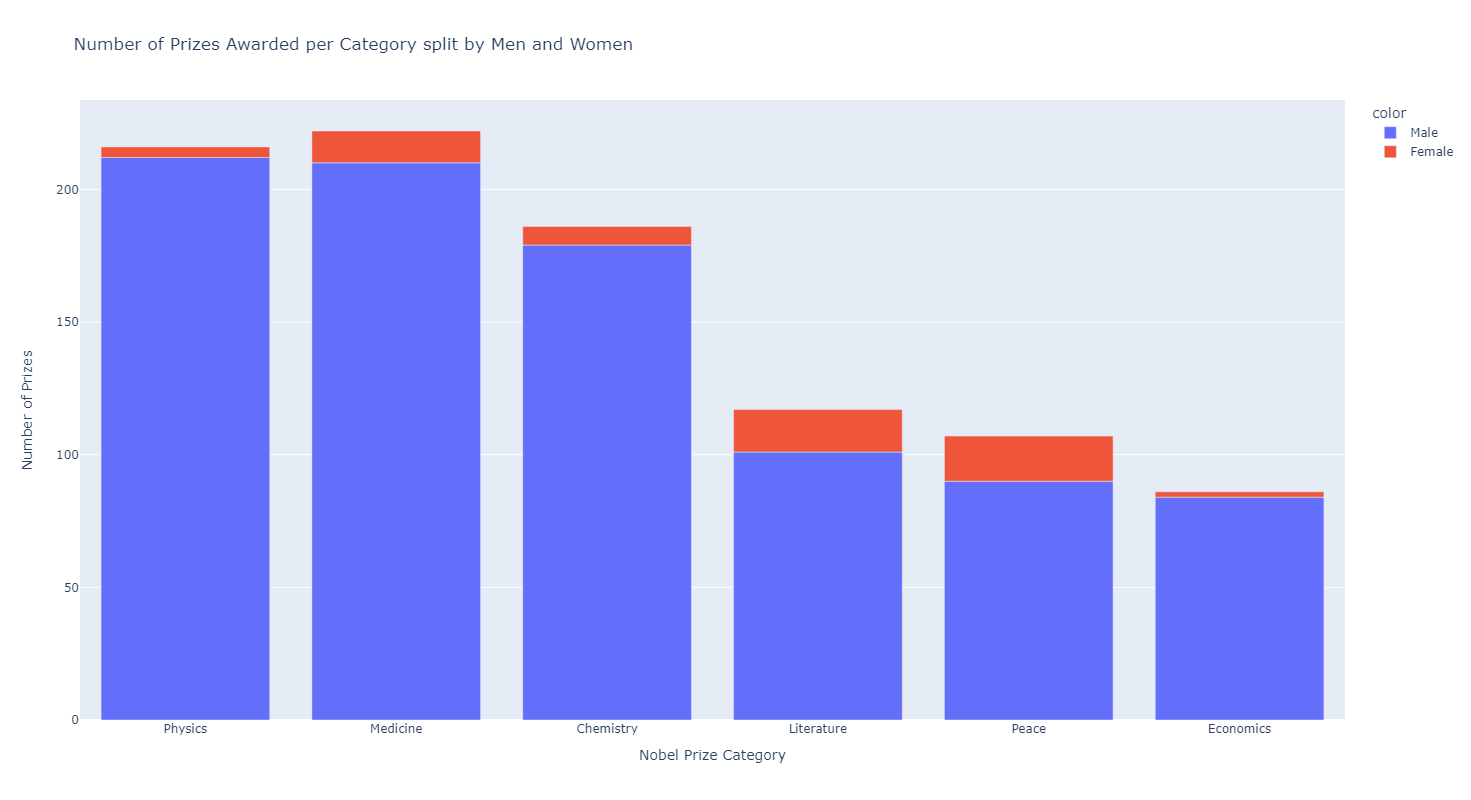

In [1594]:
v_bar_split = px.bar(x = cat_men_women.category,
                    y = cat_men_women.prize,
                    color = cat_men_women.sex,
                    title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category',
                        width=1600, 
                        height=800, 
                        yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [1595]:
yp = df_data[['year','category']]
yp.groupby('year').count()

category
year          
1901         6
1902         7
1903         7
1904         6
1905         5
...        ...
2016        11
2017        12
2018        13
2019        14
2020        12

[117 rows x 1 columns]

In [1596]:
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [1597]:
moving_average = prize_per_year.rolling(window=5).mean()

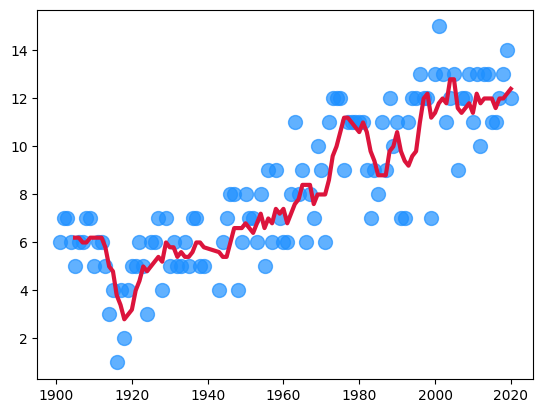

In [1598]:
plt.scatter(x=prize_per_year.index, 
                y=prize_per_year.values, 
                c='dodgerblue',
                alpha=0.7,
                s=100,)

plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()

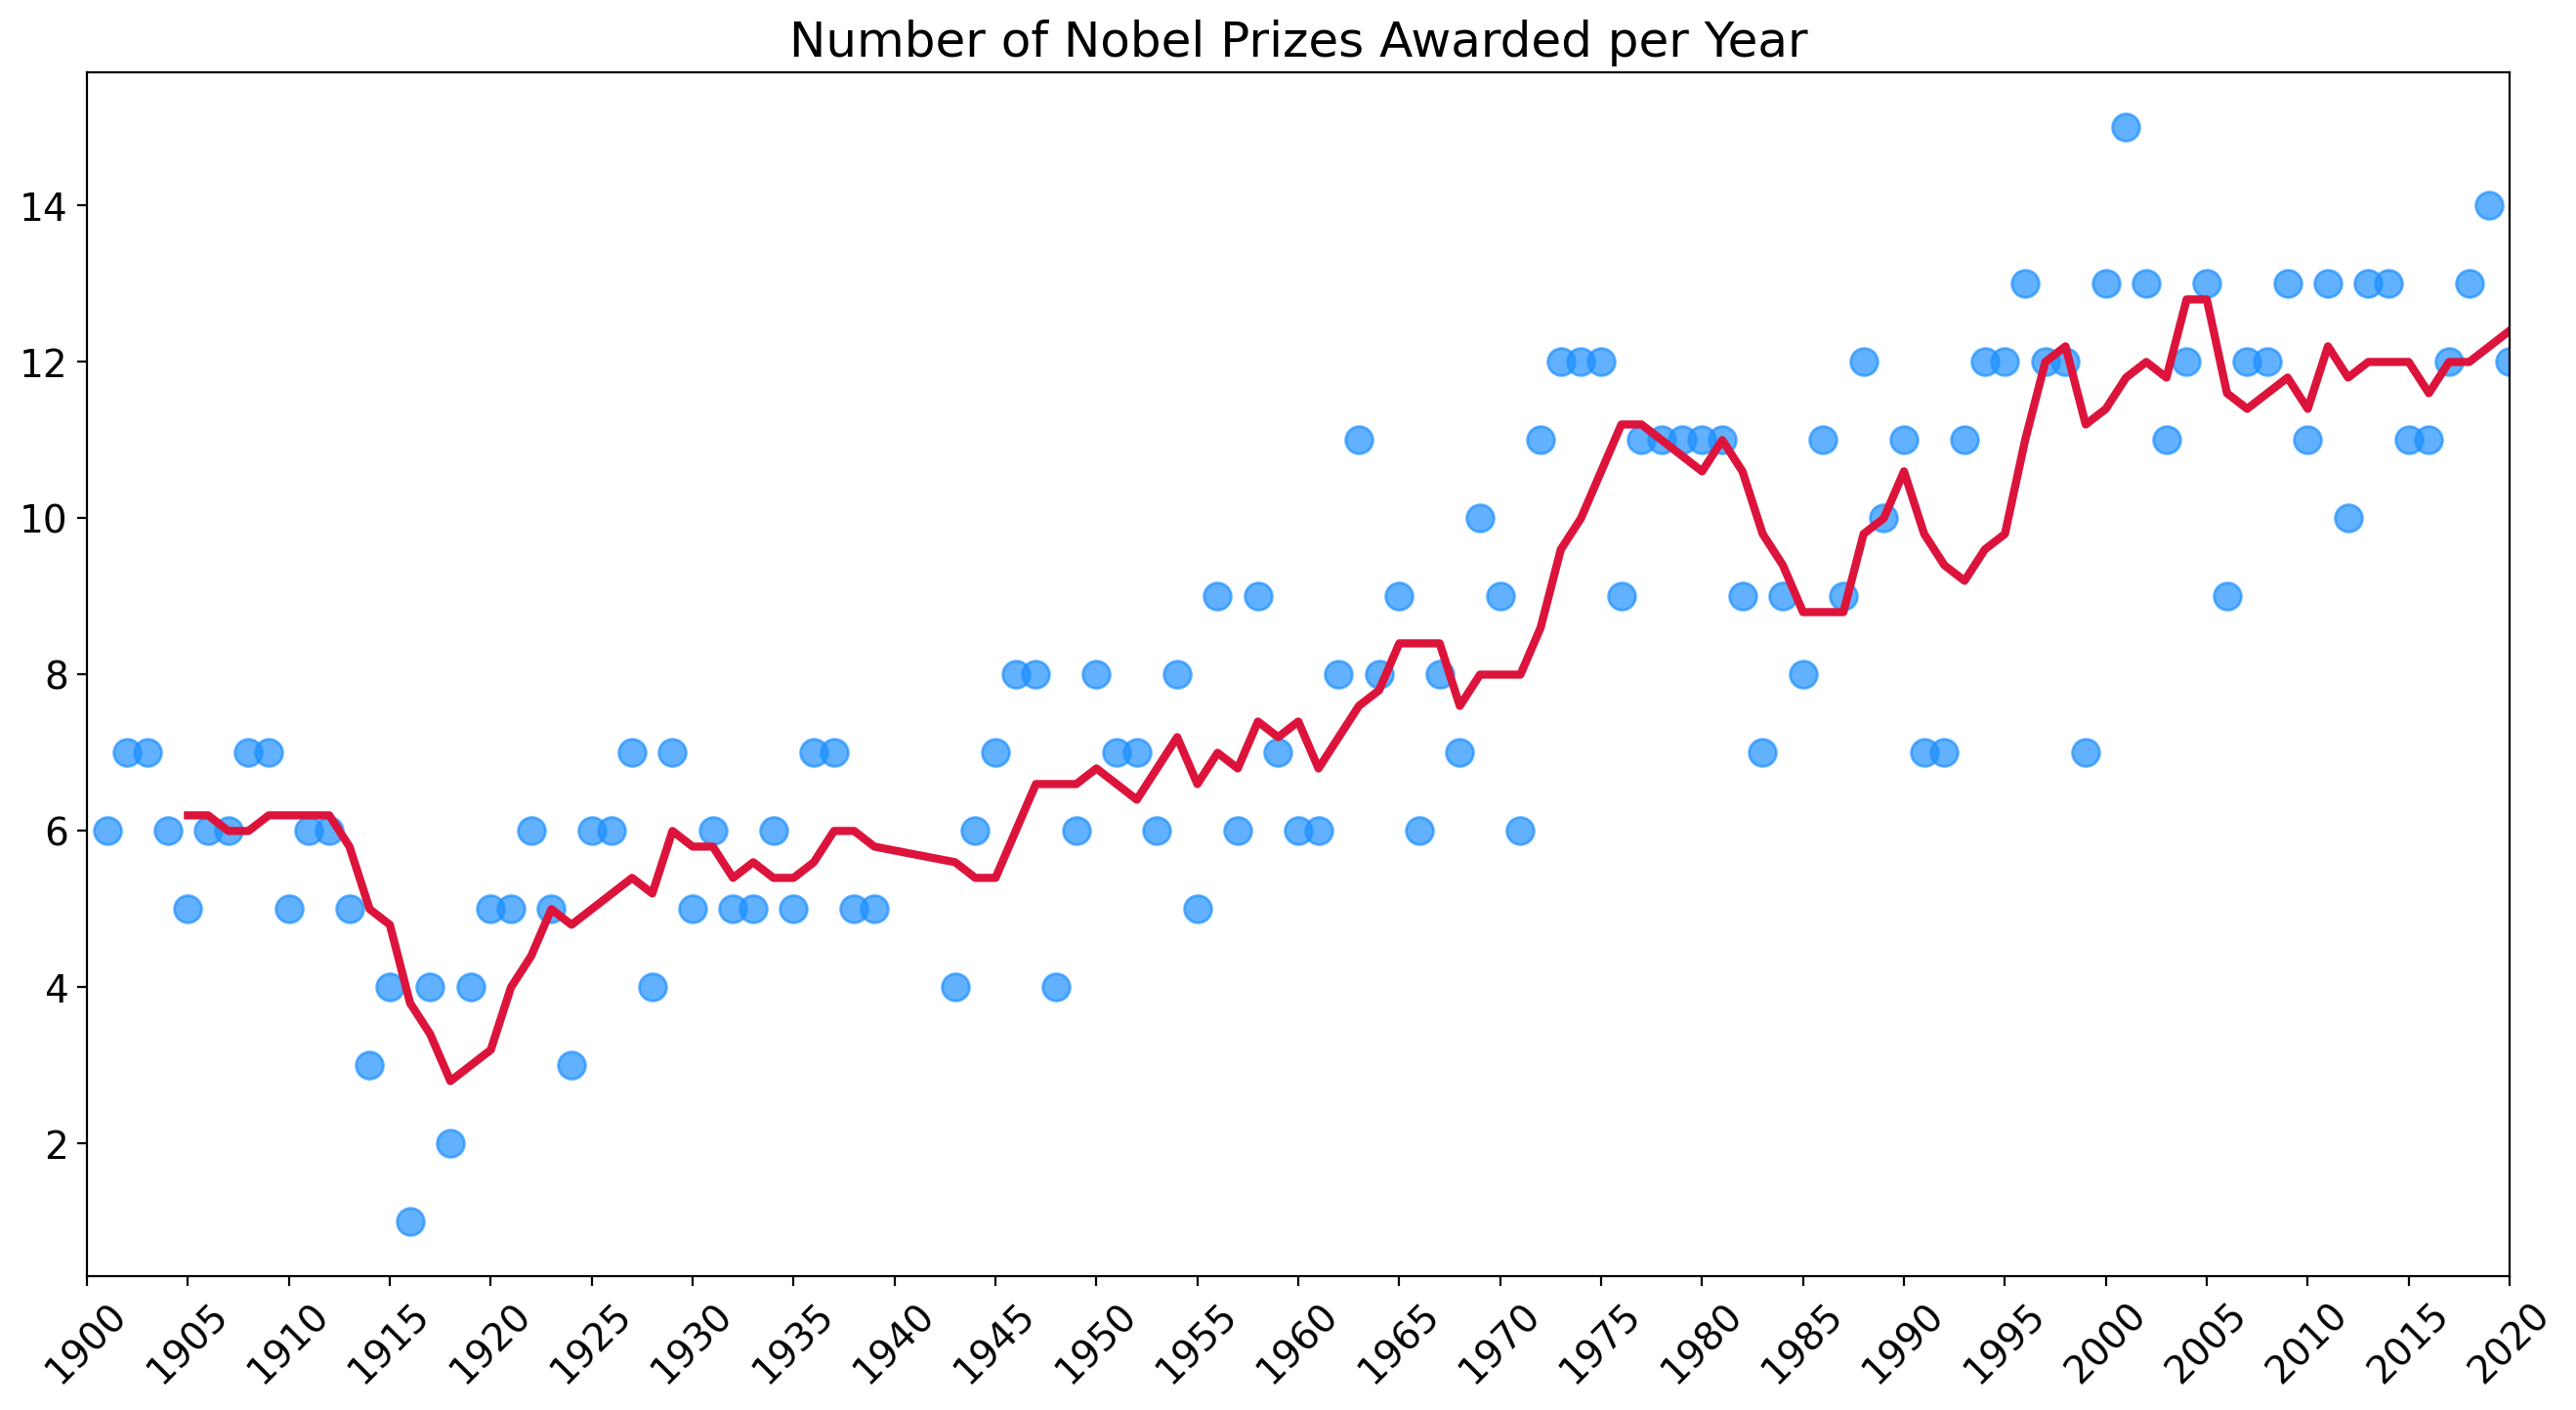

In [1599]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
        fontsize=14, 
        rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index, 
        y=prize_per_year.values, 
        c='dodgerblue',
        alpha=0.7,
        s=100,)

ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [1600]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()
yearly_avg_share

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

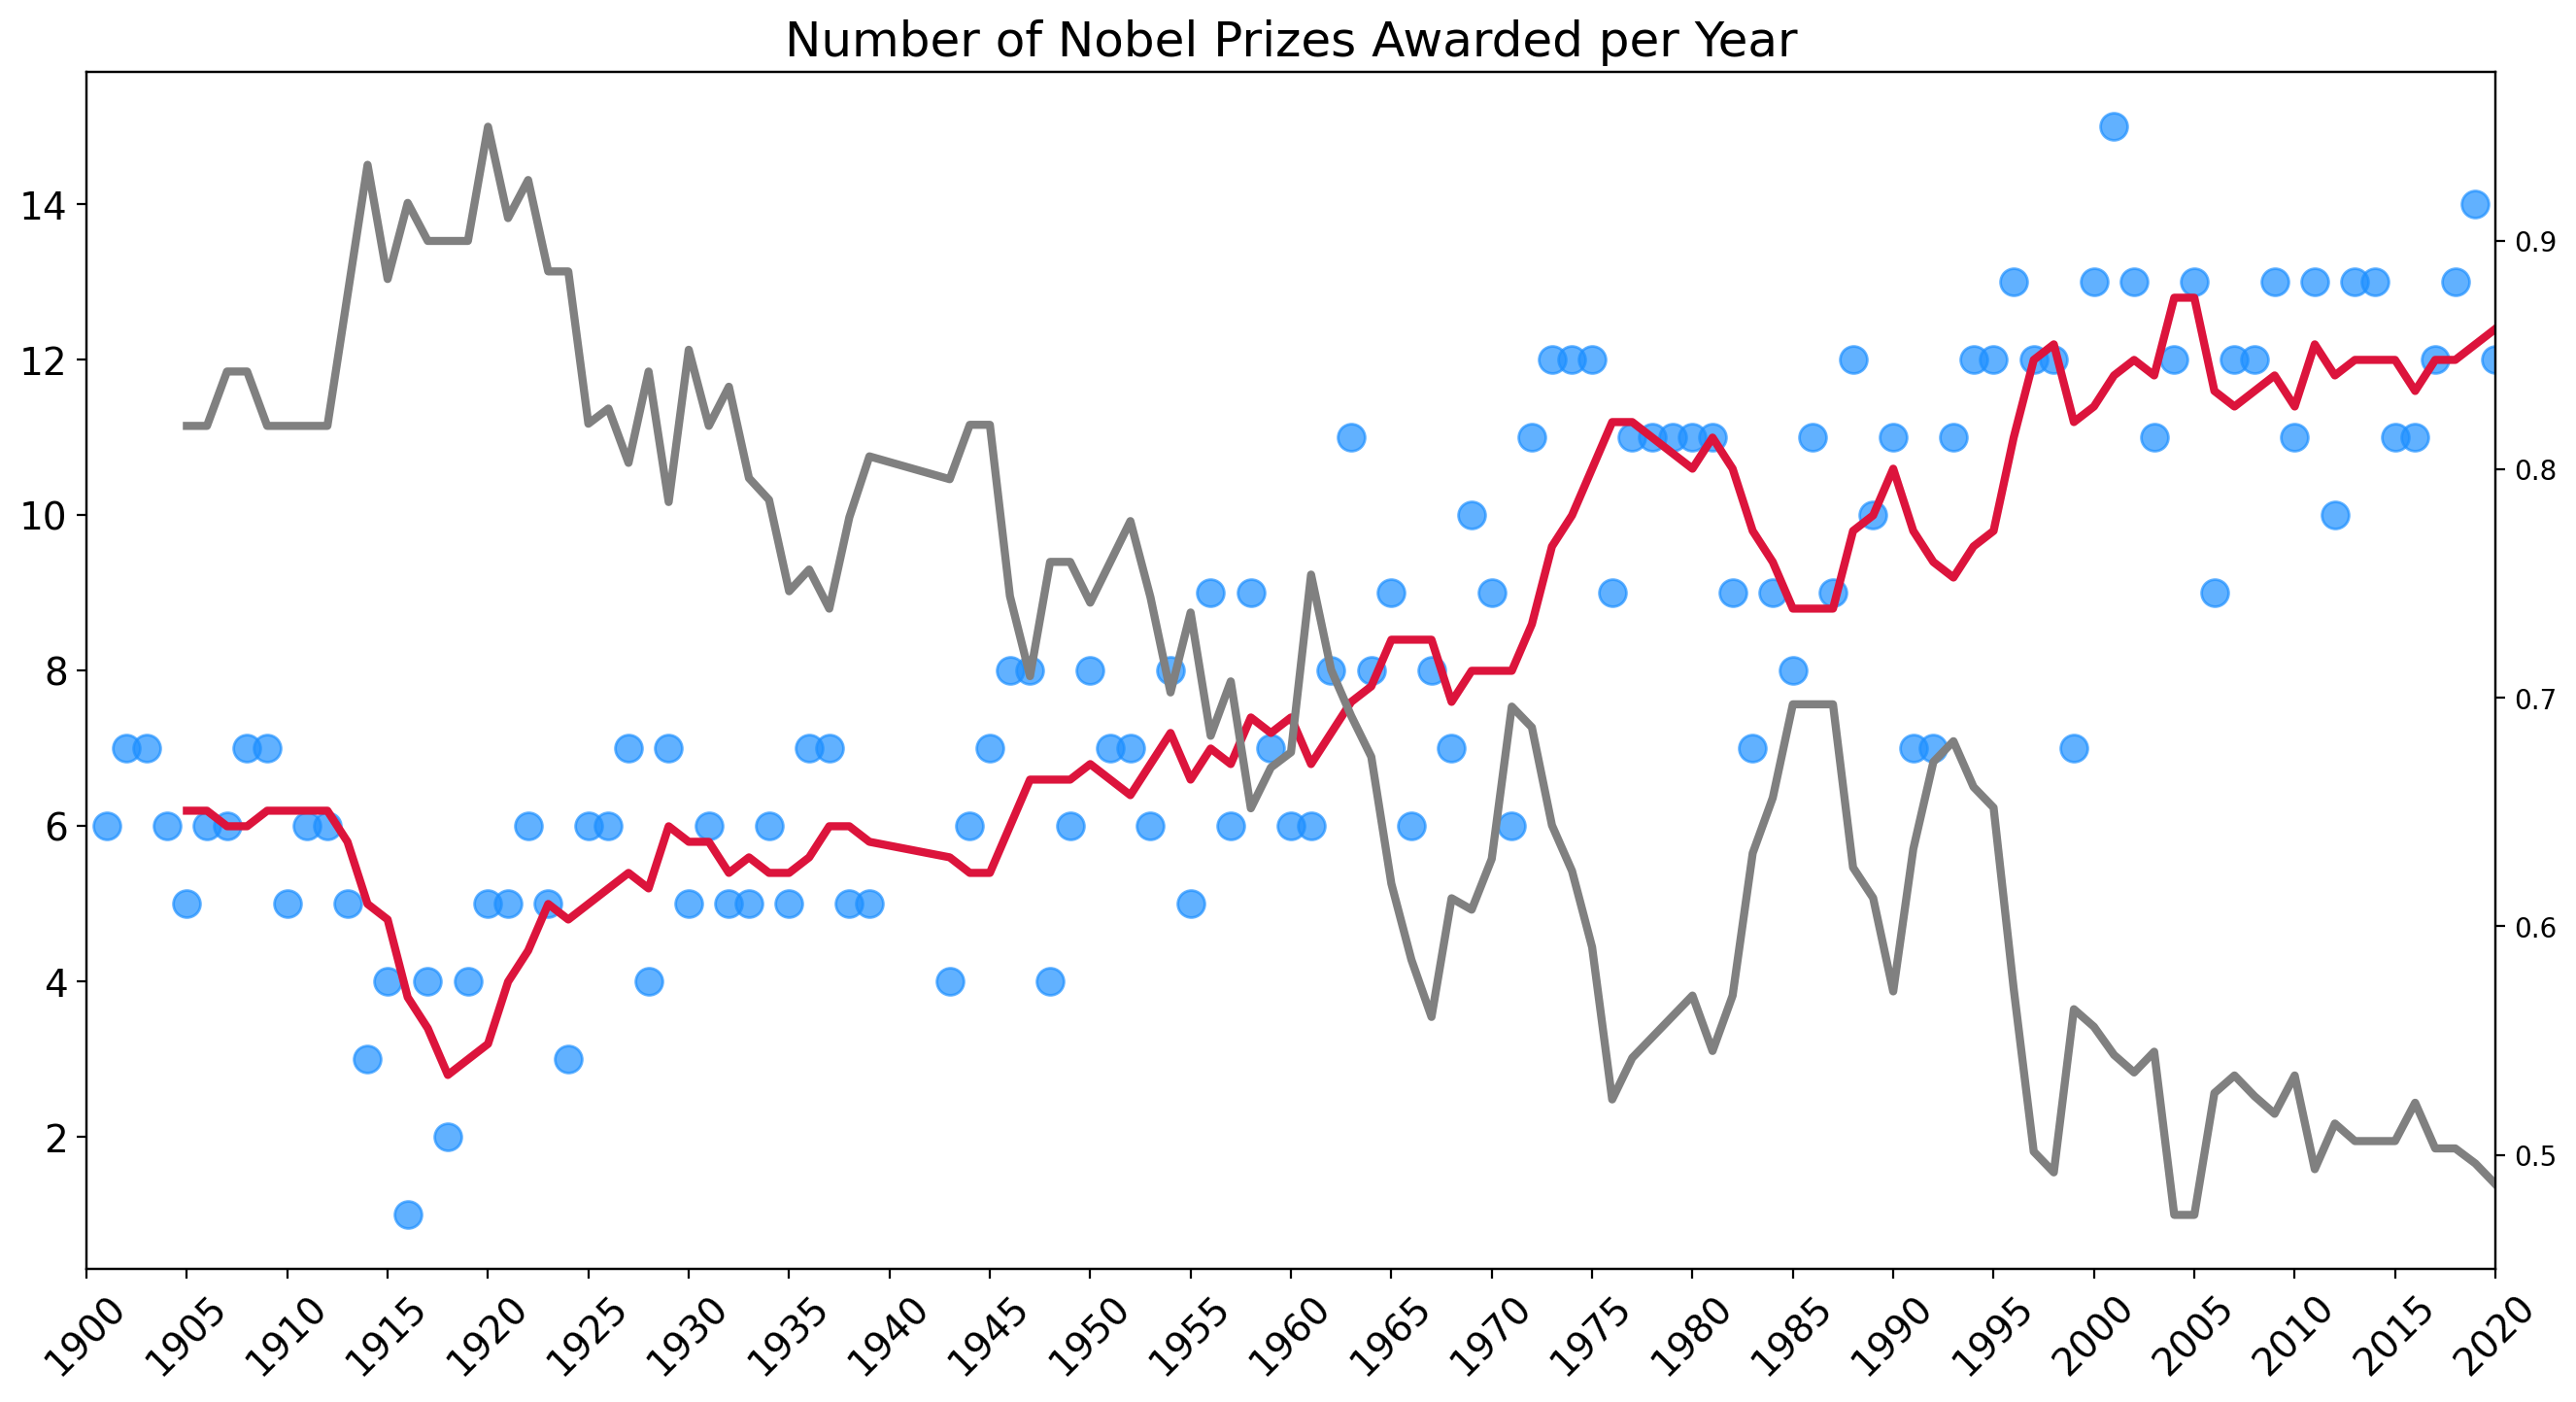

In [1601]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
            fontsize=14, 
            rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index, 
            y=prize_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,)

ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

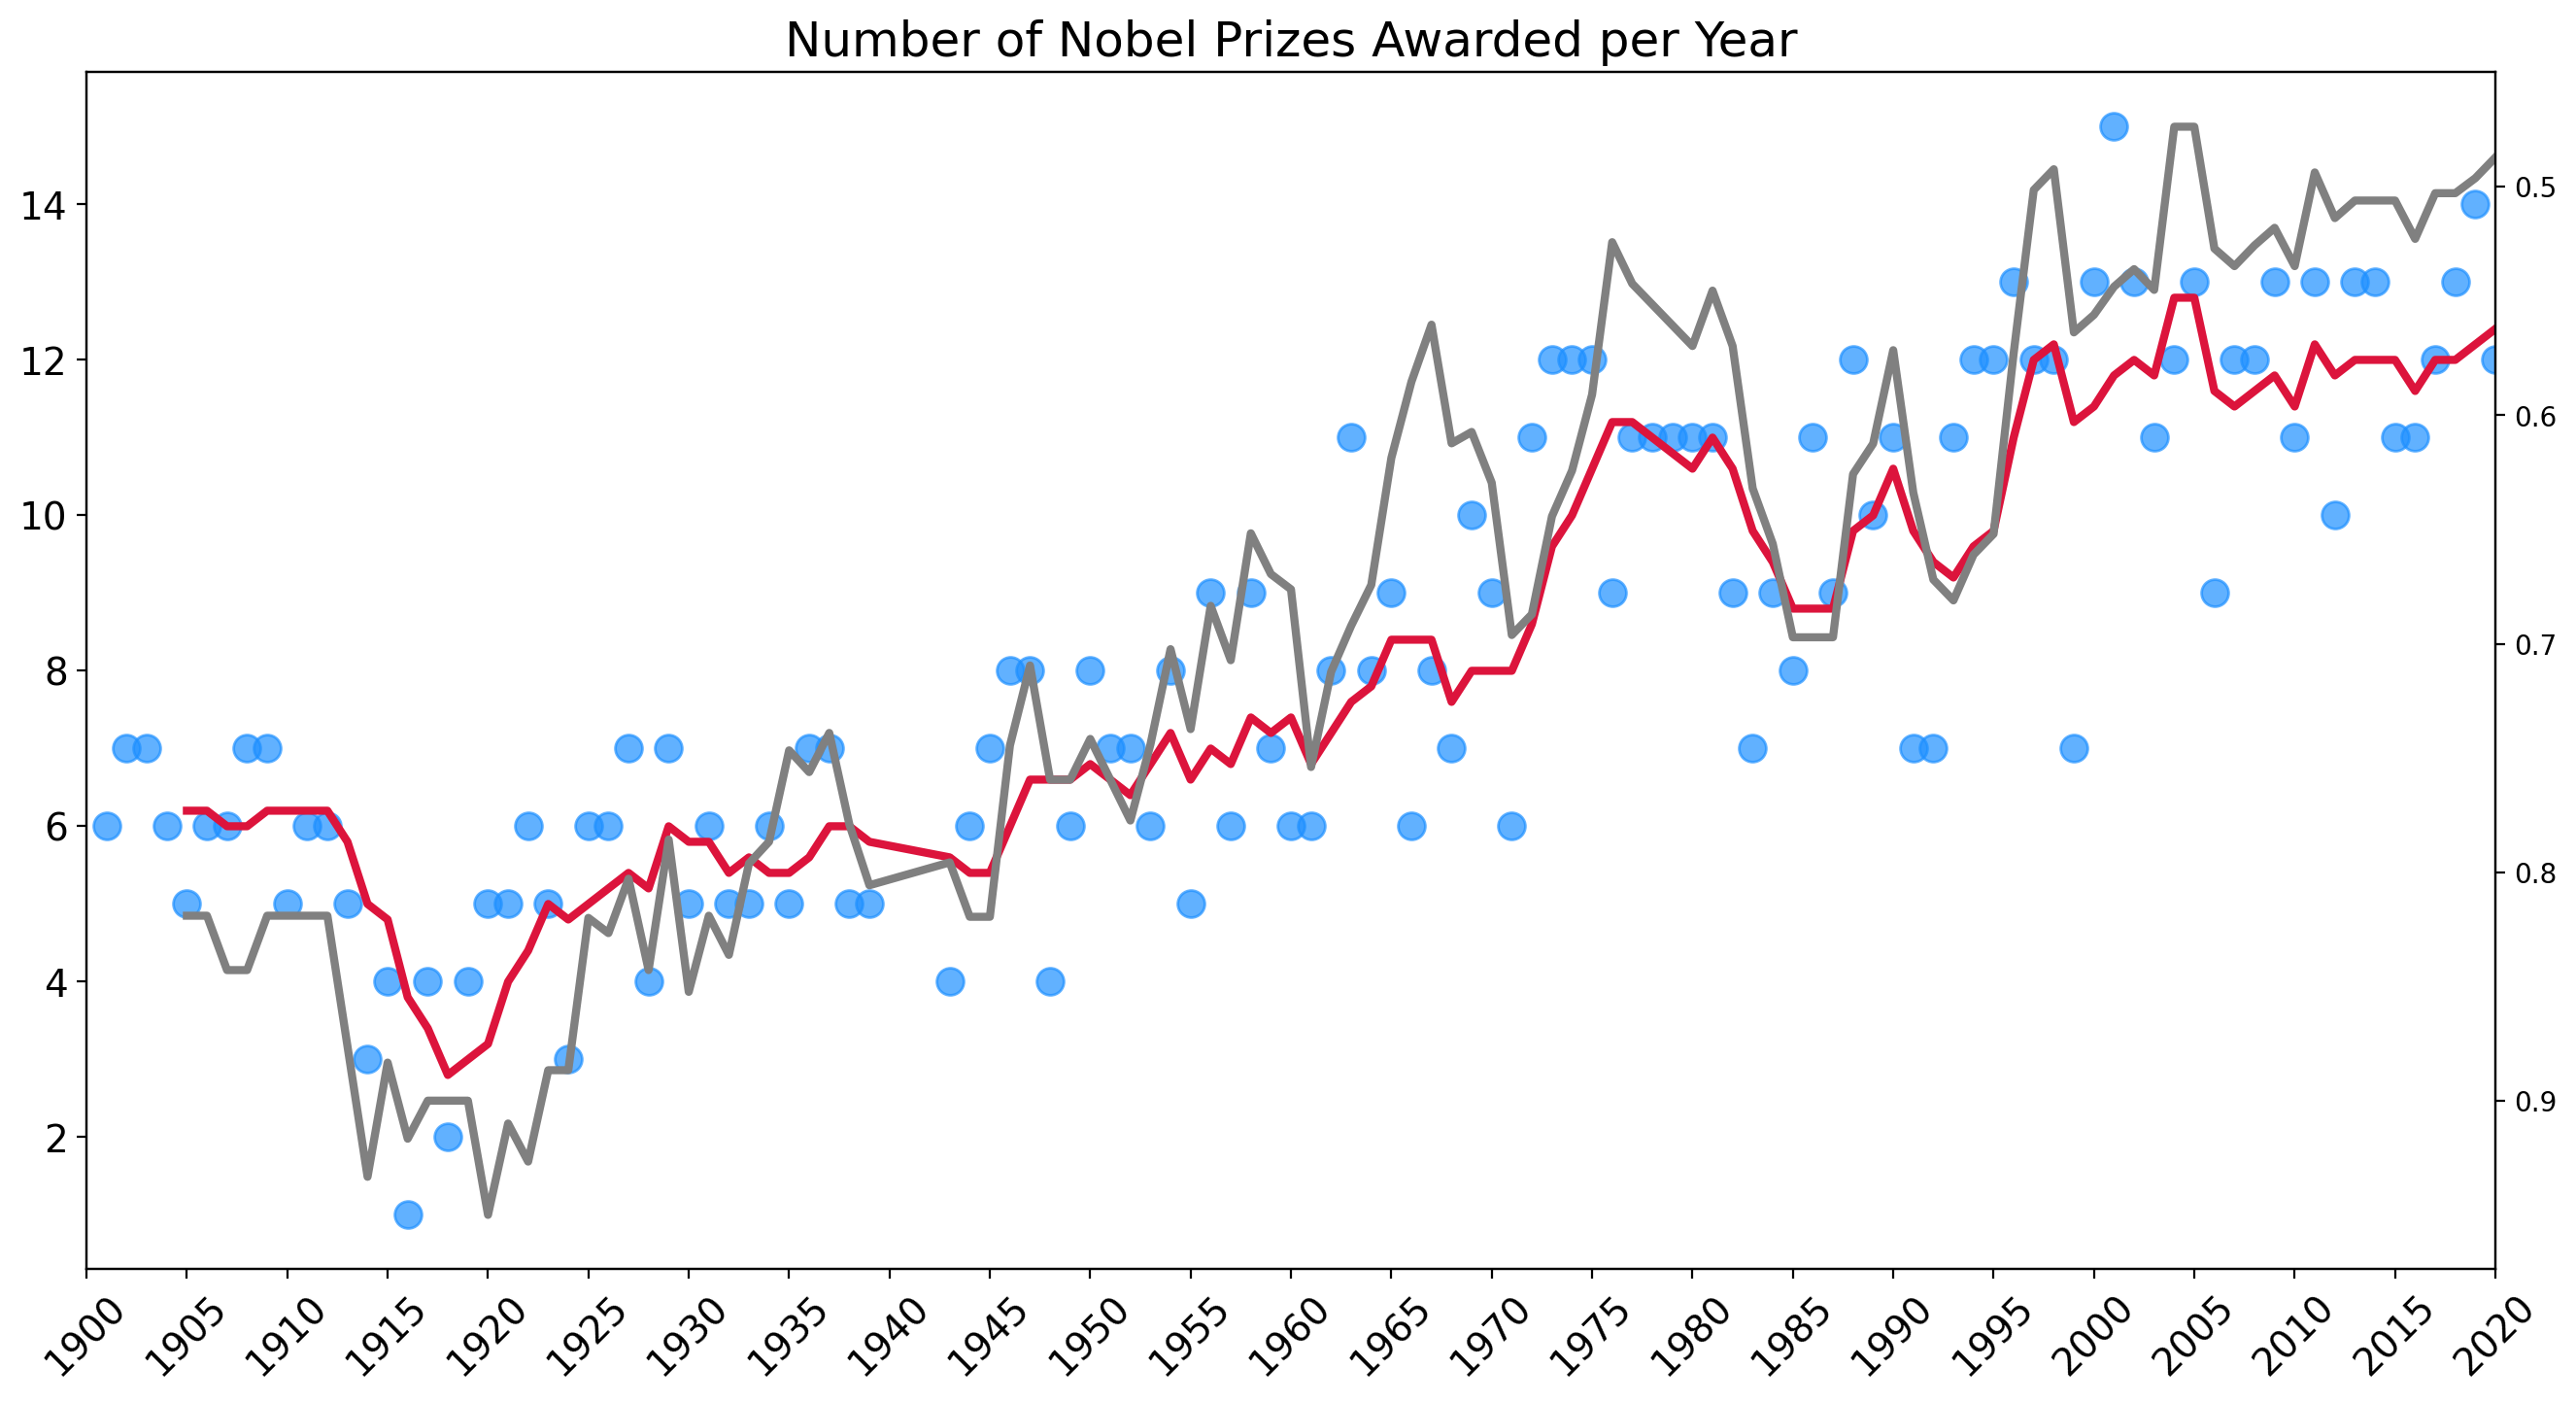

In [1602]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
            fontsize=14, 
            rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index, 
            y=prize_per_year.values, 
            c='dodgerblue',
            alpha=0.7,
            s=100,)

ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [1603]:
# Go back and review your work no hurry
top20 = df_data.groupby('birth_country_current', as_index=False).agg({'category': pd.Series.count})
top20.head(20)

birth_country_current  category
0                            Algeria         2
1                          Argentina         4
2                          Australia        10
3                            Austria        18
4                         Azerbaijan         1
5                         Bangladesh         1
6                            Belarus         4
7                            Belgium         9
8             Bosnia and Herzegovina         2
9                             Brazil         1
10                          Bulgaria         1
11                            Canada        20
12                             Chile         2
13                             China        12
14                          Colombia         2
15                        Costa Rica         1
16                           Croatia         1
17                            Cyprus         1
18                    Czech Republic         6
19  Democratic Republic of the Congo         1

In [1604]:
top20_countrie = pd.DataFrame()
top20_countrie[['countries','prizes']]=top20[['birth_country_current','category']]
top20_countrie

countries  prizes
0                    Algeria       2
1                  Argentina       4
2                  Australia      10
3                    Austria      18
4                 Azerbaijan       1
..                       ...     ...
74  United States of America     281
75                 Venezuela       1
76                   Vietnam       1
77                     Yemen       1
78                  Zimbabwe       1

[79 rows x 2 columns]

In [1605]:
top20_countries=top20_countrie.sort_values('prizes', ascending=True).tail(20)
top20_countries

countries  prizes
7                    Belgium       9
31                   Hungary       9
33                     India       9
2                  Australia      10
20                   Denmark      12
54                    Norway      12
13                     China      12
51               Netherlands      18
3                    Austria      18
39                     Italy      19
68               Switzerland      19
11                    Canada      20
61                    Russia      26
40                     Japan      27
57                    Poland      27
67                    Sweden      29
25                    France      57
26                   Germany      84
73            United Kingdom     105
74  United States of America     281

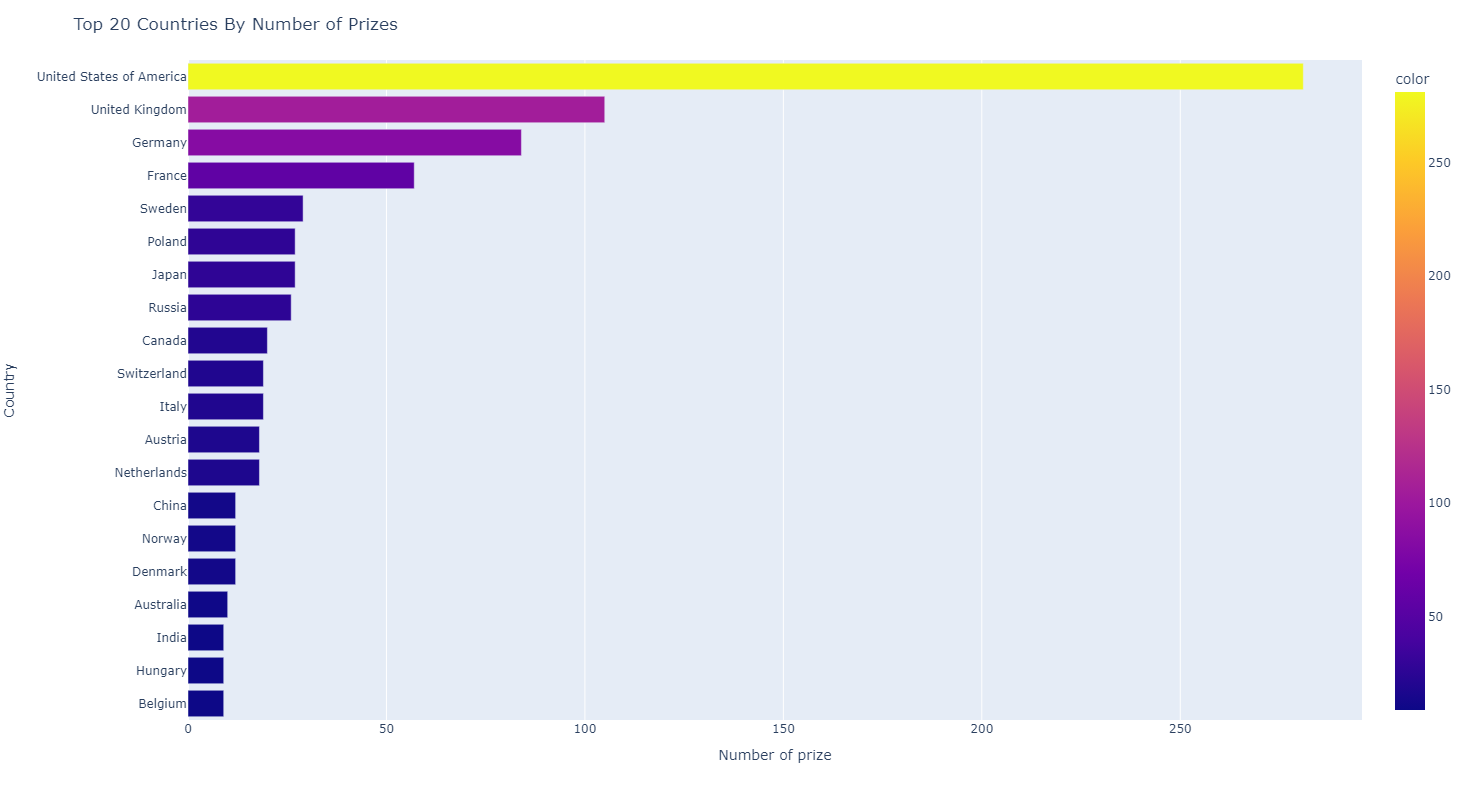

In [1606]:

bar = px.bar(y = top20_countries.countries, # index = category name
            x = top20_countries.prizes,
            orientation='h',
            hover_name=top20_countries.countries,
            color=top20_countries.prizes)
bar.update_layout(title='Top 20 Countries By Number of Prizes',
                xaxis_title='Number of prize',
                yaxis_title='Country',
                width=1600, 
                height=800,
                coloraxis_showscale=True)
bar.show()

In [1607]:
top20_countries=top20_countrie.sort_values('prizes', ascending=False).head(20)
top20_countries

countries  prizes
74  United States of America     281
73            United Kingdom     105
26                   Germany      84
25                    France      57
67                    Sweden      29
40                     Japan      27
57                    Poland      27
61                    Russia      26
11                    Canada      20
68               Switzerland      19
39                     Italy      19
3                    Austria      18
51               Netherlands      18
20                   Denmark      12
13                     China      12
54                    Norway      12
2                  Australia      10
7                    Belgium       9
33                     India       9
65              South Africa       9

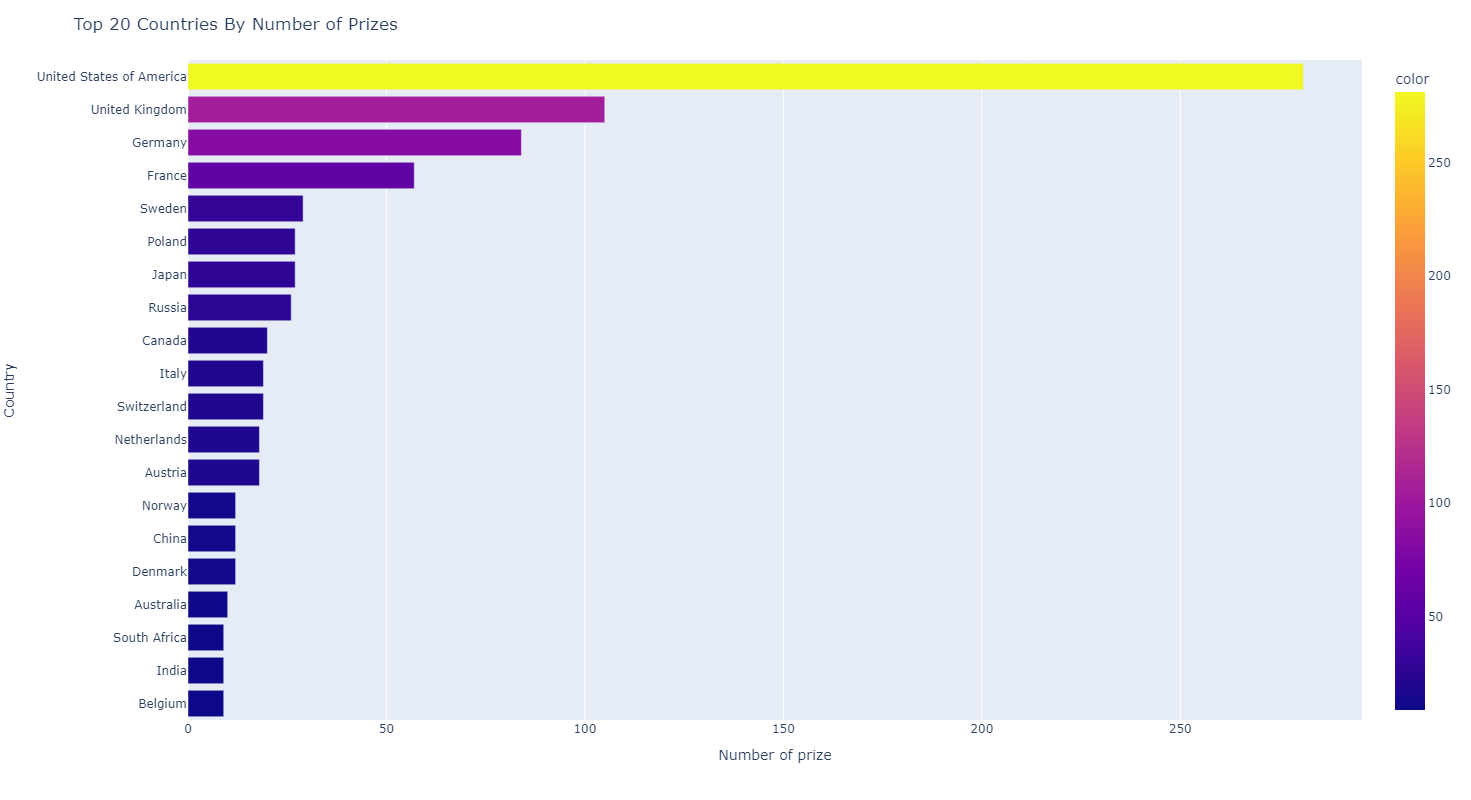

In [1608]:
bar = px.bar(y = top20_countries.countries, # index = category name
            x = top20_countries.prizes,
            orientation='h',
            hover_name=top20_countries.countries,
            color=top20_countries.prizes)
bar.update_layout(title='Top 20 Countries By Number of Prizes',
                xaxis_title='Number of prize',
                yaxis_title='Country',
                width=1600, 
                height=800,
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [1609]:
info1 = df_data.groupby(['ISO','birth_country_current'], as_index=False).agg({'category': pd.Series.count})
info1.head(20)

ISO             birth_country_current  category
0   ARG                         Argentina         4
1   AUS                         Australia        10
2   AUT                           Austria        18
3   AZE                        Azerbaijan         1
4   BEL                           Belgium         9
5   BGD                        Bangladesh         1
6   BGR                          Bulgaria         1
7   BIH            Bosnia and Herzegovina         2
8   BLR                           Belarus         4
9   BRA                            Brazil         1
10  CAN                            Canada        20
11  CHE                       Switzerland        19
12  CHL                             Chile         2
13  CHN                             China        12
14  COD  Democratic Republic of the Congo         1
15  COL                          Colombia         2
16  CRI                        Costa Rica         1
17  CYP                            Cyprus         1
18  CZE                    Czech Republic         6
19  DEU                           Germany        84

In [1610]:
map = pd.DataFrame()
map['ISO']=info1['ISO']
map['NAME']=info1['birth_country_current']
map['PRIZE']=info1['category']

In [1611]:
map

ISO          NAME  PRIZE
0   ARG     Argentina      4
1   AUS     Australia     10
2   AUT       Austria     18
3   AZE    Azerbaijan      1
4   BEL       Belgium      9
..  ...           ...    ...
74  VEN     Venezuela      1
75  VNM       Vietnam      1
76  YEM         Yemen      1
77  ZAF  South Africa      9
78  ZWE      Zimbabwe      1

[79 rows x 3 columns]

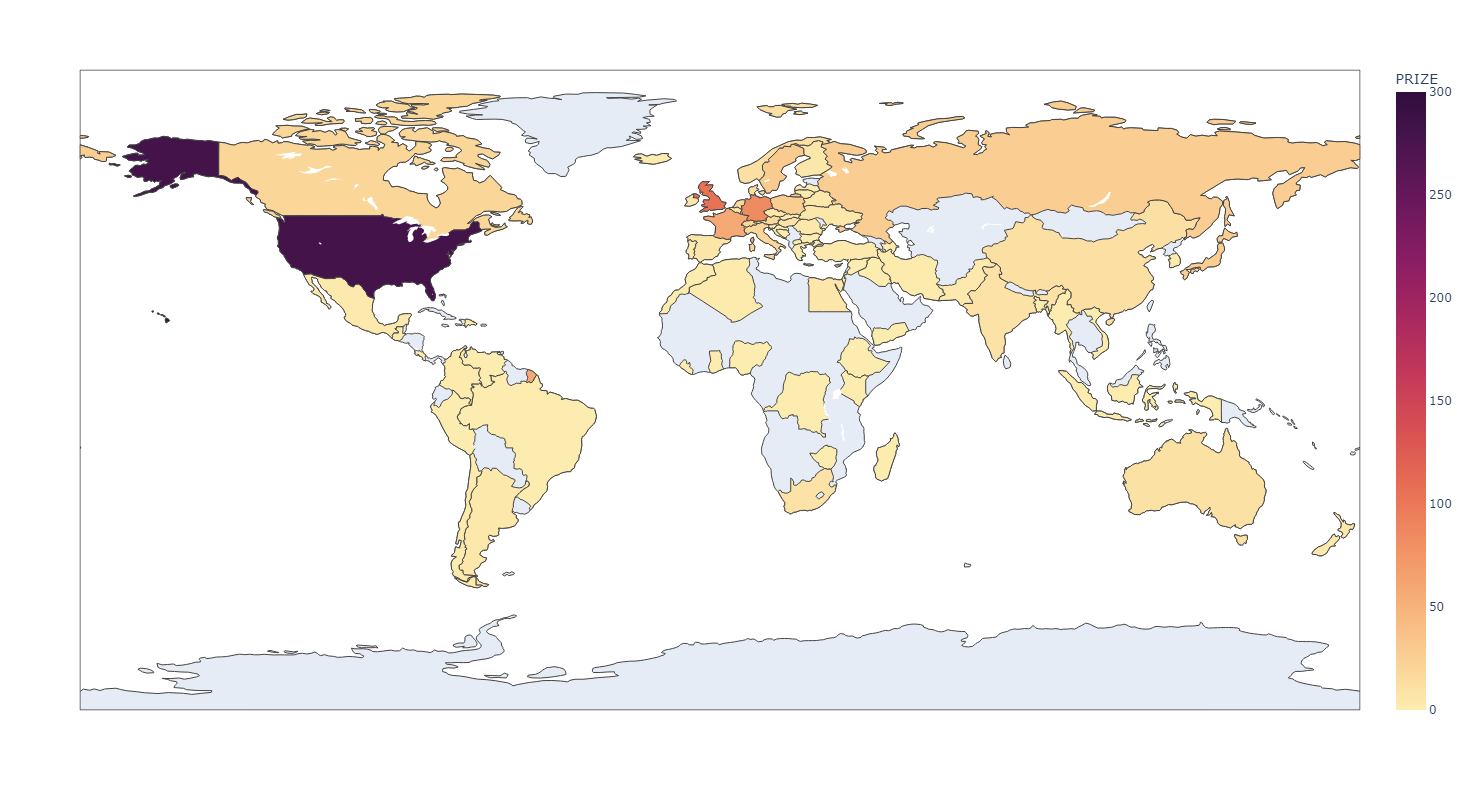

In [1612]:
worldmap = px.choropleth(map, locations='ISO', 
                    color='PRIZE', 
                    hover_name= 'NAME',
                    color_continuous_scale="matter",
                    width=1600, 
                    height=800,
                    range_color=(0, 300))
worldmap.show()

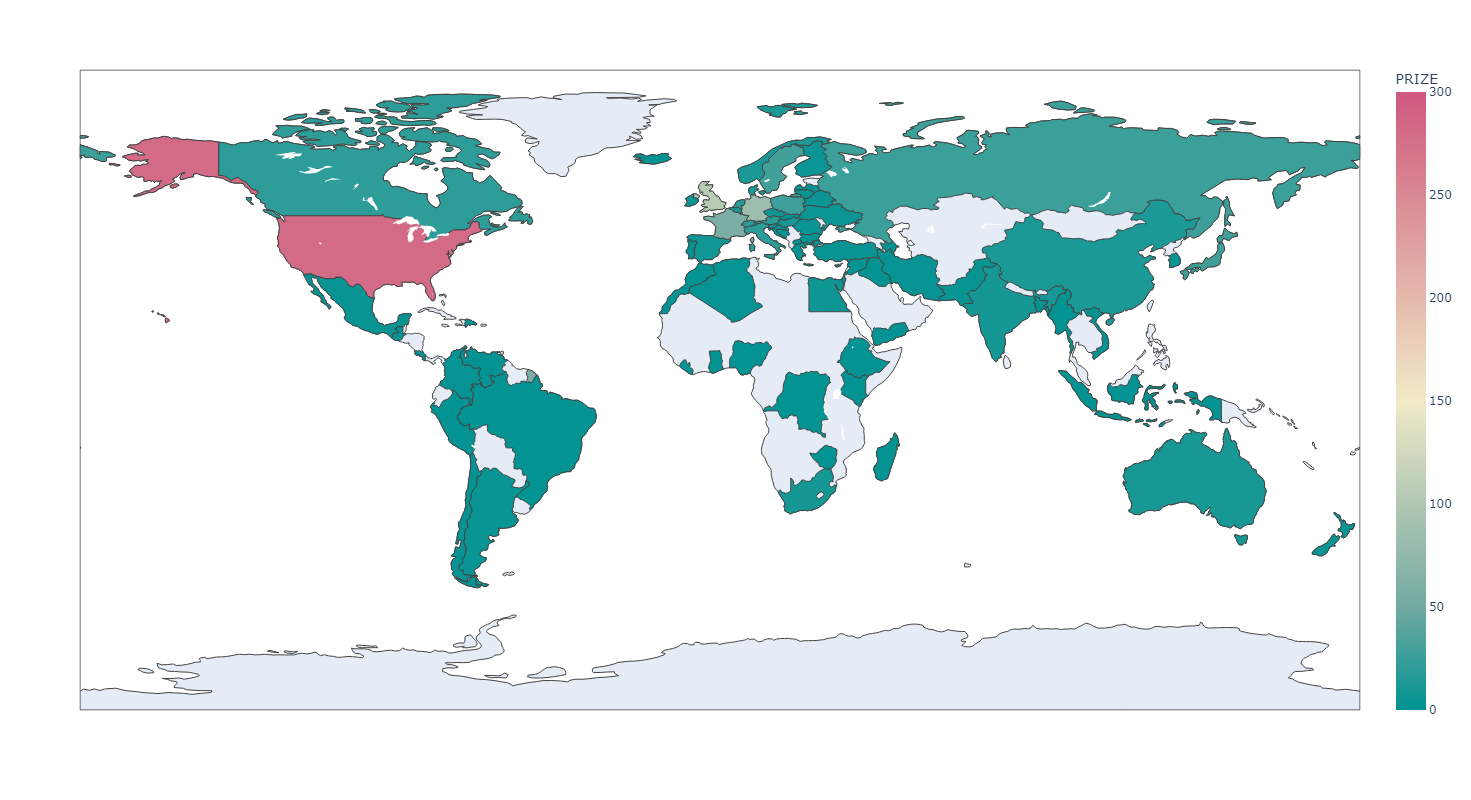

In [1613]:
worldmap = px.choropleth(map, locations='ISO', 
                    color='PRIZE', 
                    hover_name= 'NAME',
                    color_continuous_scale="tealrose",
                    width=1600, 
                    height=800,
                    range_color=(0, 300))
worldmap.show()

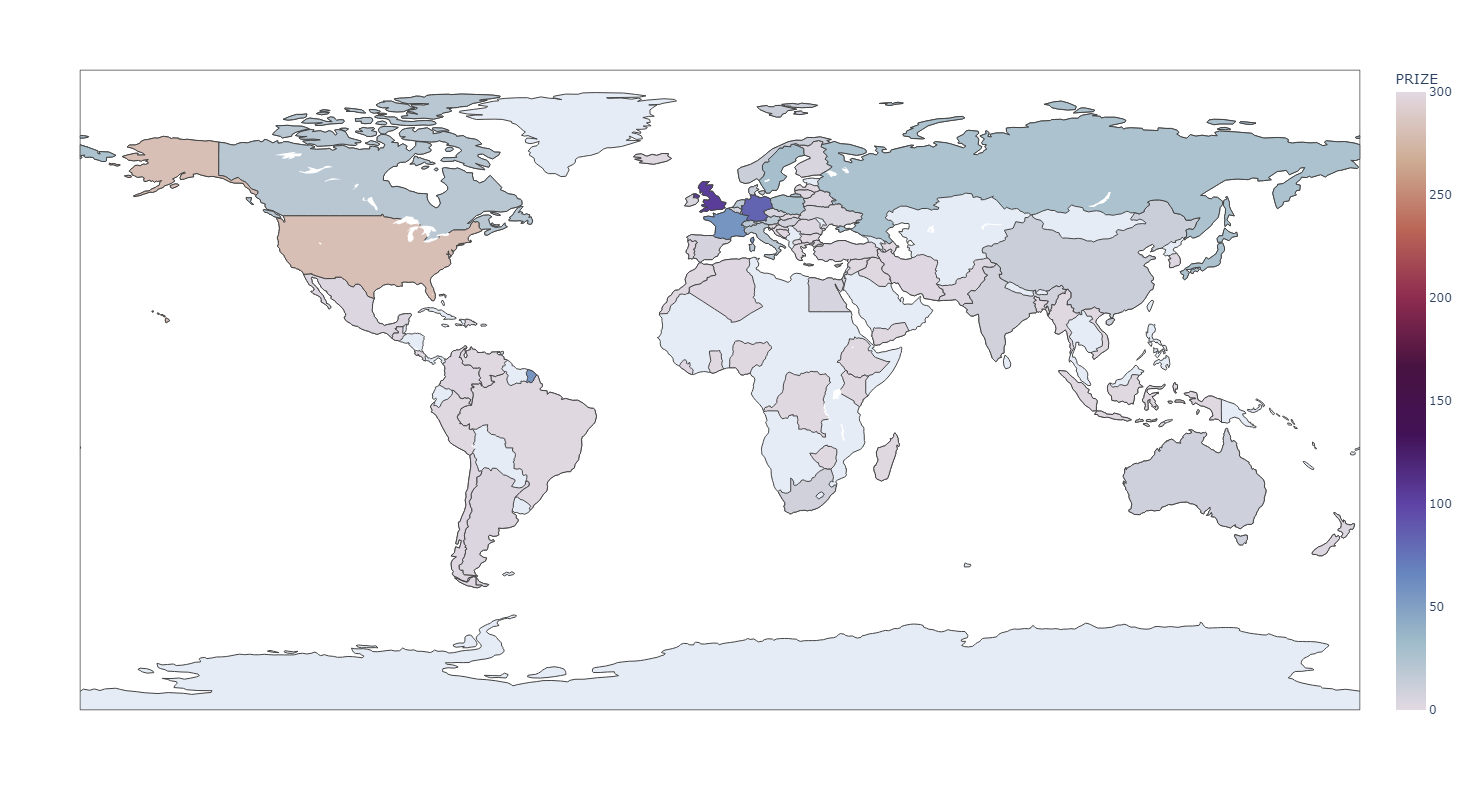

In [1614]:
worldmap = px.choropleth(map, locations='ISO', 
                    color='PRIZE', 
                    hover_name= 'NAME',
                    color_continuous_scale="twilight",
                    width=1600, 
                    height=800,
                    range_color=(0, 300))
worldmap.show()

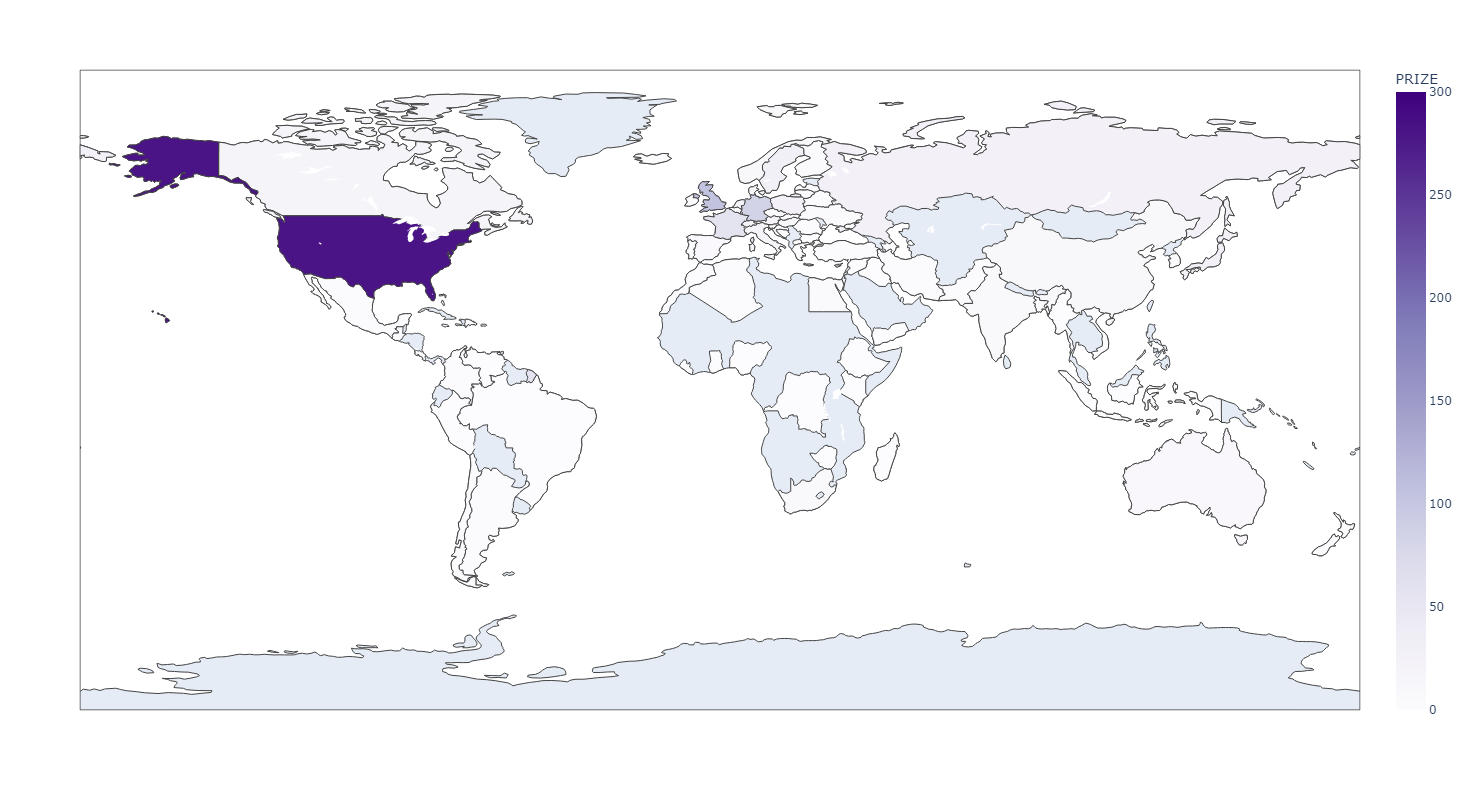

In [1615]:
worldmap = px.choropleth(map, locations='ISO', 
                    color='PRIZE', 
                    hover_name= 'NAME',
                    color_continuous_scale="purples",
                    width=1600, 
                    height=800,
                    range_color=(0, 300))
worldmap.show()

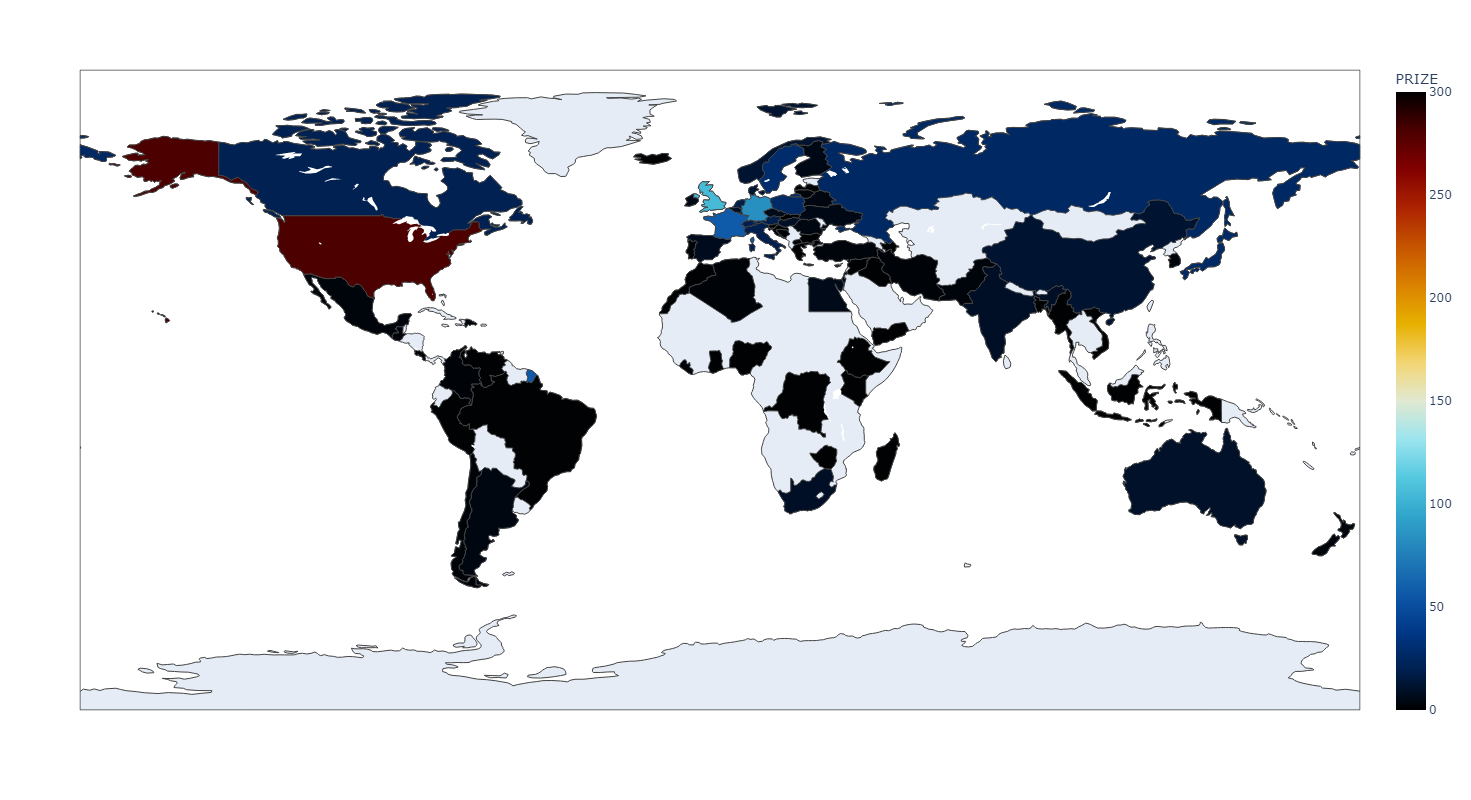

In [1616]:
worldmap = px.choropleth(map, locations='ISO', 
                    color='PRIZE', 
                    hover_name= 'NAME',
                    color_continuous_scale="icefire",
                    width=1600, 
                    height=800,
                    range_color=(0, 300))

worldmap.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [1617]:
info = df_data.groupby(['birth_country_current','category'], as_index=False).count()
m=df_data.groupby(['birth_country_current'], as_index=False).agg({'category': pd.Series.count})

In [1618]:
info

birth_country_current    category  year  prize  motivation  \
0                     Algeria  Literature     1      1           1   
1                     Algeria     Physics     1      1           1   
2                   Argentina    Medicine     2      2           2   
3                   Argentina       Peace     2      2           0   
4                   Australia   Chemistry     1      1           1   
..                        ...         ...   ...    ...         ...   
206  United States of America     Physics    70     70          70   
207                 Venezuela    Medicine     1      1           1   
208                   Vietnam       Peace     1      1           0   
209                     Yemen       Peace     1      1           1   
210                  Zimbabwe       Peace     1      1           0   

     prize_share  laureate_type  full_name  birth_date  birth_city  \
0              1              1          1           1           1   
1              1              1          1           1           1   
2              2              2          2           2           2   
3              2              2          2           2           2   
4              1              1          1           1           1   
..           ...            ...        ...         ...         ...   
206           70             70         70          70          70   
207            1              1          1           1           1   
208            1              1          1           1           1   
209            1              1          1           1           1   
210            1              1          1           1           1   

     birth_country  sex  organization_name  organization_city  \
0                1    1                  0                  0   
1                1    1                  1                  1   
2                2    2                  2                  2   
3                2    2                  0                  0   
4                1    1                  1                  1   
..             ...  ...                ...                ...   
206             70   70                 70                 68   
207              1    1                  1                  1   
208              1    1                  0                  0   
209              1    1                  0                  0   
210              1    1                  0                  0   

     organization_country  ISO  share_pct  
0                       0    1          1  
1                       1    1          1  
2                       2    2          2  
3                       0    2          2  
4                       1    1          1  
..                    ...  ...        ...  
206                    68   70         70  
207                     1    1          1  
208                     0    1          1  
209                     0    1          1  
210                     0    1          1  

[211 rows x 17 columns]

In [1619]:
m

birth_country_current  category
0                    Algeria         2
1                  Argentina         4
2                  Australia        10
3                    Austria        18
4                 Azerbaijan         1
..                       ...       ...
74  United States of America       281
75                 Venezuela         1
76                   Vietnam         1
77                     Yemen         1
78                  Zimbabwe         1

[79 rows x 2 columns]

In [1620]:
info = pd.merge(info, m, how='outer', on=['birth_country_current'])
info

birth_country_current  category_x  year  prize  motivation  \
0                     Algeria  Literature     1      1           1   
1                     Algeria     Physics     1      1           1   
2                   Argentina    Medicine     2      2           2   
3                   Argentina       Peace     2      2           0   
4                   Australia   Chemistry     1      1           1   
..                        ...         ...   ...    ...         ...   
206  United States of America     Physics    70     70          70   
207                 Venezuela    Medicine     1      1           1   
208                   Vietnam       Peace     1      1           0   
209                     Yemen       Peace     1      1           1   
210                  Zimbabwe       Peace     1      1           0   

     prize_share  laureate_type  full_name  birth_date  birth_city  \
0              1              1          1           1           1   
1              1              1          1           1           1   
2              2              2          2           2           2   
3              2              2          2           2           2   
4              1              1          1           1           1   
..           ...            ...        ...         ...         ...   
206           70             70         70          70          70   
207            1              1          1           1           1   
208            1              1          1           1           1   
209            1              1          1           1           1   
210            1              1          1           1           1   

     birth_country  sex  organization_name  organization_city  \
0                1    1                  0                  0   
1                1    1                  1                  1   
2                2    2                  2                  2   
3                2    2                  0                  0   
4                1    1                  1                  1   
..             ...  ...                ...                ...   
206             70   70                 70                 68   
207              1    1                  1                  1   
208              1    1                  0                  0   
209              1    1                  0                  0   
210              1    1                  0                  0   

     organization_country  ISO  share_pct  category_y  
0                       0    1          1           2  
1                       1    1          1           2  
2                       2    2          2           4  
3                       0    2          2           4  
4                       1    1          1          10  
..                    ...  ...        ...         ...  
206                    68   70         70         281  
207                     1    1          1           1  
208                     0    1          1           1  
209                     0    1          1           1  
210                     0    1          1           1  

[211 rows x 18 columns]

In [1621]:
topcat20 = info[['birth_country_current','category_x']]
topcat20['cat_prize']=info['year']
topcat20['total_prize']=info['category_y']
topcat20.columns=['birth_country_current','category','cat_prize','total_prize']
plottop1=topcat20
plottop1

C:\Users\Deleo Anangfac\AppData\Local\Temp\ipykernel_33780\4037235265.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Deleo Anangfac\AppData\Local\Temp\ipykernel_33780\4037235265.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



birth_country_current    category  cat_prize  total_prize
0                     Algeria  Literature          1            2
1                     Algeria     Physics          1            2
2                   Argentina    Medicine          2            4
3                   Argentina       Peace          2            4
4                   Australia   Chemistry          1           10
..                        ...         ...        ...          ...
206  United States of America     Physics         70          281
207                 Venezuela    Medicine          1            1
208                   Vietnam       Peace          1            1
209                     Yemen       Peace          1            1
210                  Zimbabwe       Peace          1            1

[211 rows x 4 columns]

In [1622]:
topcat20 = topcat20.sort_values('total_prize', ascending=False).head(53)
topcat20

birth_country_current    category  cat_prize  total_prize
204  United States of America    Medicine         78          281
203  United States of America  Literature         10          281
201  United States of America   Chemistry         55          281
205  United States of America       Peace         19          281
206  United States of America     Physics         70          281
202  United States of America   Economics         49          281
199            United Kingdom       Peace         11          105
198            United Kingdom    Medicine         28          105
197            United Kingdom  Literature          7          105
196            United Kingdom   Economics          8          105
195            United Kingdom   Chemistry         27          105
200            United Kingdom     Physics         24          105
76                    Germany     Physics         26           84
75                    Germany       Peace          5           84
74                    Germany    Medicine         18           84
73                    Germany  Literature          8           84
72                    Germany   Economics          1           84
71                    Germany   Chemistry         26           84
65                     France   Chemistry         10           57
70                     France     Physics         10           57
69                     France       Peace         10           57
68                     France    Medicine         12           57
66                     France   Economics          4           57
67                     France  Literature         11           57
182                    Sweden     Physics          4           29
181                    Sweden       Peace          5           29
180                    Sweden    Medicine          7           29
178                    Sweden   Economics          2           29
177                    Sweden   Chemistry          4           29
179                    Sweden  Literature          7           29
153                    Poland     Physics          8           27
152                    Poland       Peace          2           27
151                    Poland    Medicine          6           27
150                    Poland  Literature          6           27
149                    Poland   Economics          1           27
148                    Poland   Chemistry          4           27
114                     Japan     Physics         11           27
113                     Japan       Peace          1           27
112                     Japan    Medicine          5           27
111                     Japan  Literature          3           27
110                     Japan   Chemistry          7           27
165                    Russia       Peace          2           26
166                    Russia     Physics         10           26
164                    Russia    Medicine          2           26
163                    Russia  Literature          5           26
162                    Russia   Economics          3           26
161                    Russia   Chemistry          4           26
31                     Canada       Peace          1           20
32                     Canada     Physics          6           20
30                     Canada    Medicine          4           20
29                     Canada  Literature          2           20
28                     Canada   Economics          3           20
27                     Canada   Chemistry          4           20

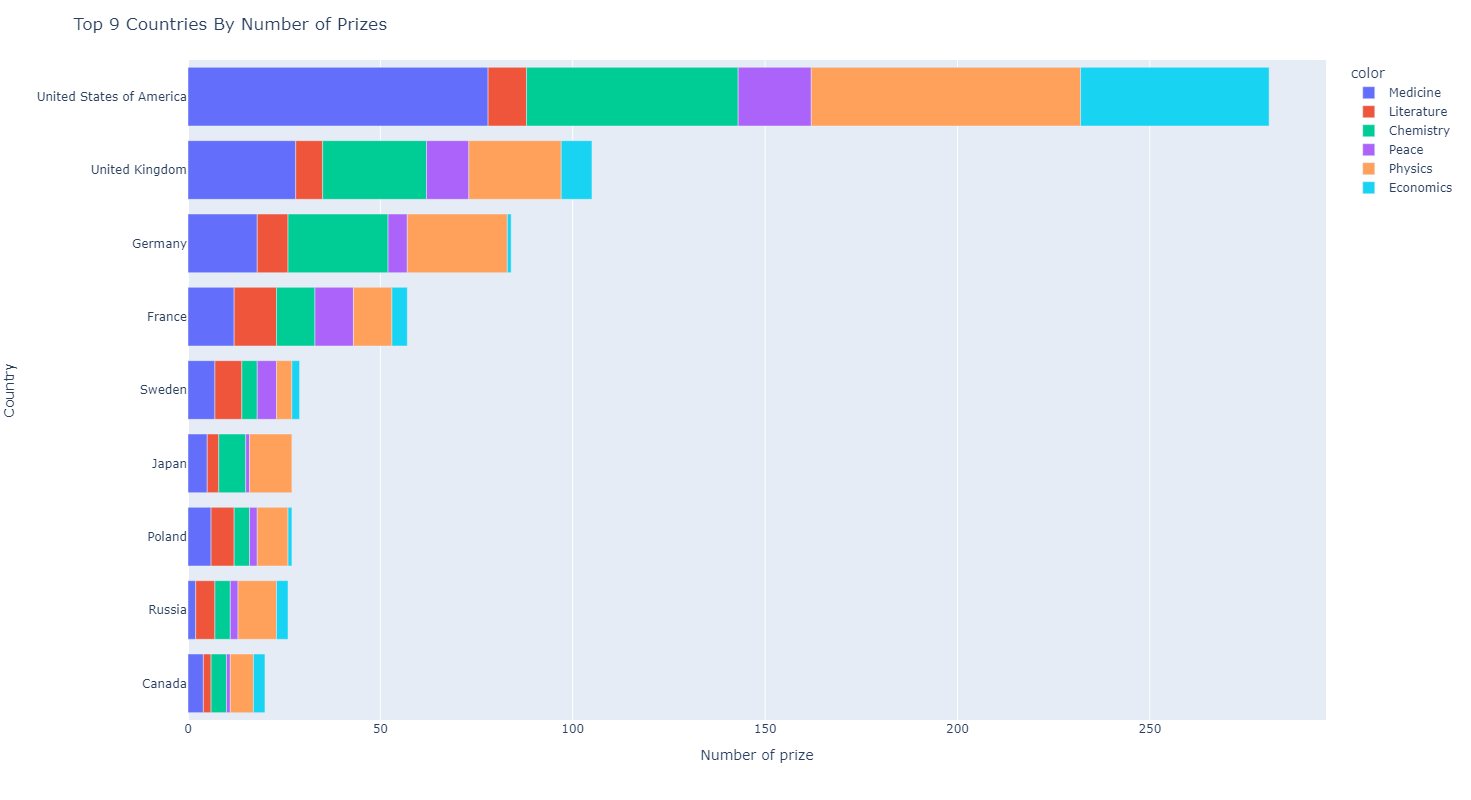

In [1623]:
bar = px.bar(y = topcat20.birth_country_current, # index = category name
            x = topcat20.cat_prize,
            orientation='h',
            hover_name=topcat20.category,
            color=topcat20.category)
bar.update_layout(title='Top 9 Countries By Number of Prizes',
                xaxis_title='Number of prize',
                yaxis_title='Country',
                width=1600, 
                height=800,
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
bar.show()

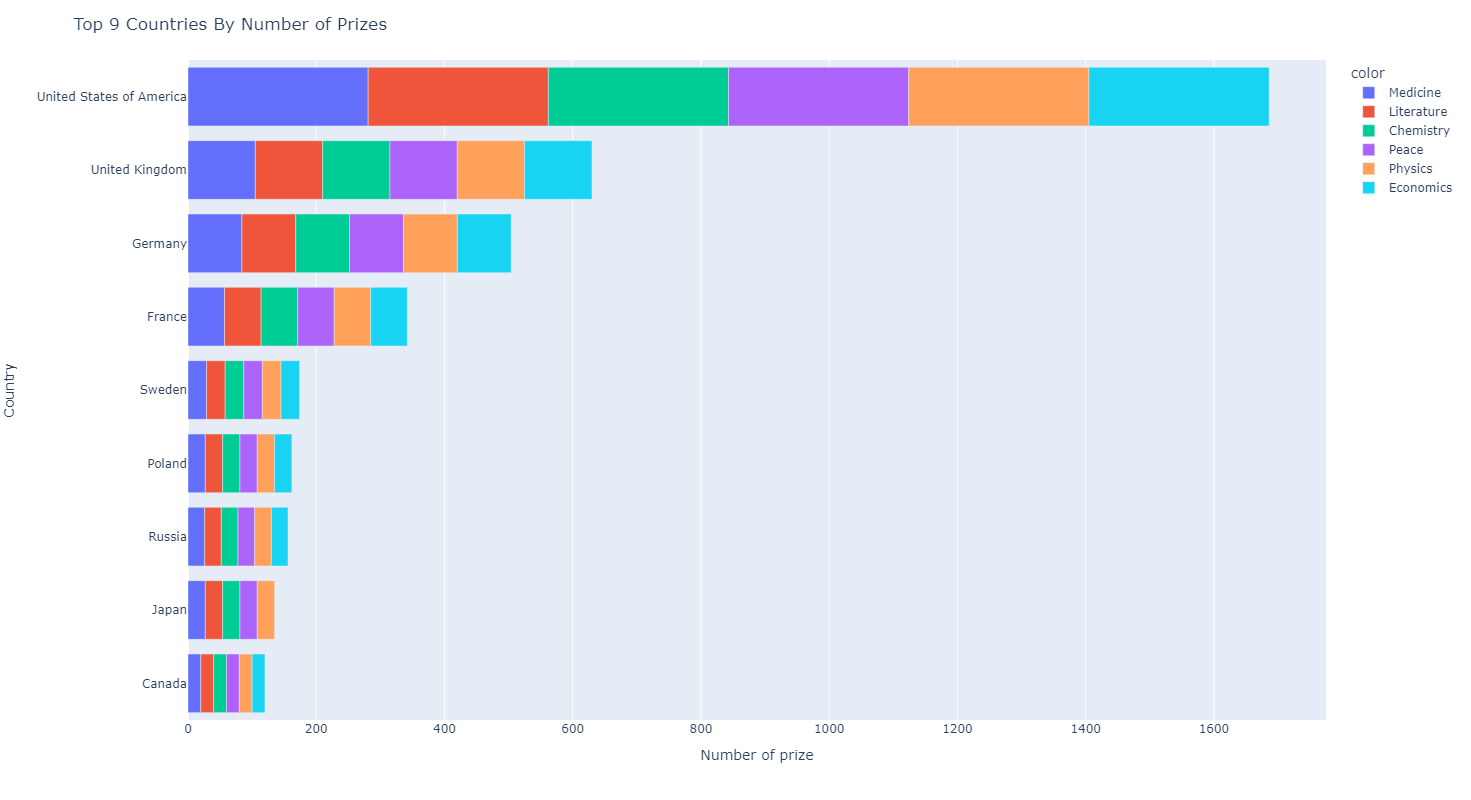

In [1624]:
bar = px.bar(y = topcat20.birth_country_current, # index = category name
            x = topcat20.total_prize,
            orientation='h',
            hover_name=topcat20.cat_prize,
            color=topcat20.category)
bar.update_layout(title='Top 9 Countries By Number of Prizes',
                xaxis_title='Number of prize',
                yaxis_title='Country',
                width=1600, 
                height=800,
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [1625]:
plottop2=df_data.groupby(['year','category'], as_index=False).agg({'prize': pd.Series.count})
plottop2

year    category  prize
0    1901   Chemistry      1
1    1901  Literature      1
2    1901    Medicine      1
3    1901       Peace      2
4    1901     Physics      1
..    ...         ...    ...
598  2020   Economics      2
599  2020  Literature      1
600  2020    Medicine      3
601  2020       Peace      1
602  2020     Physics      3

[603 rows x 3 columns]

In [1626]:
plottop = pd.merge(plottop1, plottop2, how='outer', on=['category'])
plottop=plottop.sort_values('total_prize').tail(1000)

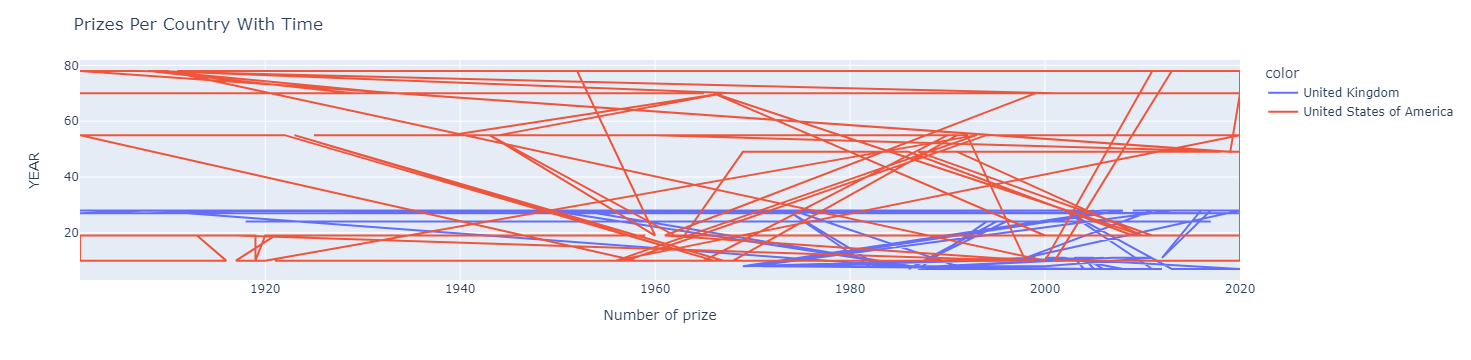

In [1627]:
line = px.line(x=plottop.year,
                y=plottop.cat_prize,
                color=plottop.birth_country_current)

line.update_layout(title='Prizes Per Country With Time',
                xaxis_title='Number of prize',
                yaxis_title='YEAR',
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
line.show()

In [1628]:
# Correct
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year

birth_country_current  year  category  prize  motivation  prize_share  \
0                     Algeria  1957         1      1           1            1   
1                     Algeria  1997         1      1           1            1   
2                   Argentina  1936         1      1           0            1   
3                   Argentina  1947         1      1           1            1   
4                   Argentina  1980         1      1           0            1   
..                        ...   ...       ...    ...         ...          ...   
622  United States of America  2020         7      7           7            7   
623                 Venezuela  1980         1      1           1            1   
624                   Vietnam  1973         1      1           0            1   
625                     Yemen  2011         1      1           1            1   
626                  Zimbabwe  1960         1      1           0            1   

     laureate_type  full_name  birth_date  birth_city  birth_country  sex  \
0                1          1           1           1              1    1   
1                1          1           1           1              1    1   
2                1          1           1           1              1    1   
3                1          1           1           1              1    1   
4                1          1           1           1              1    1   
..             ...        ...         ...         ...            ...  ...   
622              7          7           7           7              7    7   
623              1          1           1           1              1    1   
624              1          1           1           1              1    1   
625              1          1           1           1              1    1   
626              1          1           1           1              1    1   

     organization_name  organization_city  organization_country  ISO  \
0                    0                  0                     0    1   
1                    1                  1                     1    1   
2                    0                  0                     0    1   
3                    1                  1                     1    1   
4                    0                  0                     0    1   
..                 ...                ...                   ...  ...   
622                  6                  6                     6    7   
623                  1                  1                     1    1   
624                  0                  0                     0    1   
625                  0                  0                     0    1   
626                  0                  0                     0    1   

     share_pct  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
622          7  
623          1  
624          1  
625          1  
626          1  

[627 rows x 17 columns]

In [1629]:
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [1630]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [1631]:
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

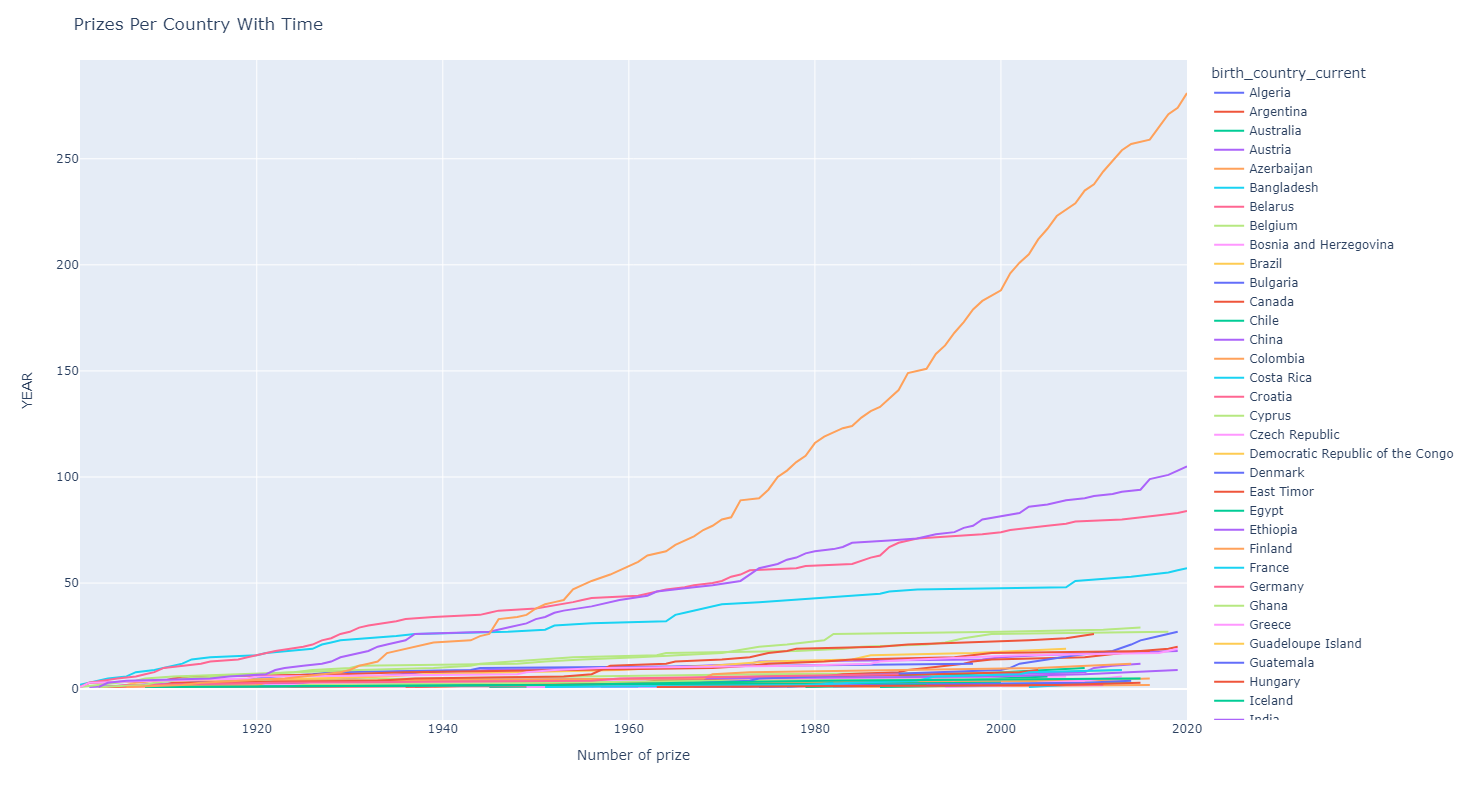

In [1632]:
line = px.line(cumulative_prizes,
                x='year',
                y='prize',
                color='birth_country_current')

line.update_layout(title='Prizes Per Country With Time',
                xaxis_title='Number of prize',
                yaxis_title='YEAR',
                width=1600, 
                height=800,
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
line.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [1633]:
organ = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count})
organ

organization_name  prize
0               A.F. Ioffe Physico-Technical Institute      1
1                                    Aarhus University      1
2                                  Academy of Sciences      3
3                                 Amsterdam University      2
4                          Argonne National Laboratory      1
..                                                 ...    ...
259       École Nationale Supérieur des Mines de Paris      1
260                           École Normale Supérieure      1
261                                École Polytechnique      2
262             École Supérieure de Physique et Chimie      1
263  École municipale de physique et de chimie indu...      1

[264 rows x 2 columns]

In [1634]:
coun = df_data.groupby(['organization_name','birth_country_current'], as_index=False)
coun=coun[['organization_name','birth_country_current']].head(707)
coun

organization_name     birth_country_current
0                Berlin University               Netherlands
2               Marburg University                    Poland
5                Munich University                   Germany
6                Berlin University                   Germany
8        University College London                     India
..                             ...                       ...
956  National Institutes of Health  United States of America
957          University of Alberta            United Kingdom
959       University of California  United States of America
960       University of California                   Germany
961           University of Oxford            United Kingdom

[707 rows x 2 columns]

In [1635]:
merging = pd.merge(coun, organ, how='left', on=['organization_name'])
merging

organization_name     birth_country_current  prize
0                Berlin University               Netherlands      6
1               Marburg University                    Poland      1
2                Munich University                   Germany      5
3                Berlin University                   Germany      6
4        University College London                     India      7
..                             ...                       ...    ...
702  National Institutes of Health  United States of America      5
703          University of Alberta            United Kingdom      1
704       University of California  United States of America     40
705       University of California                   Germany     40
706           University of Oxford            United Kingdom     12

[707 rows x 3 columns]

In [1636]:
merge = merging.drop_duplicates('organization_name')
merge

organization_name birth_country_current  \
0                                    Berlin University           Netherlands   
1                                   Marburg University                Poland   
2                                    Munich University               Germany   
4                            University College London                 India   
5                                    Leiden University           Netherlands   
..                                                 ...                   ...   
683                             University of Waterloo                Canada   
685                            Asahi Kasei Corporation                 Japan   
687  Binghamton University State University of New ...        United Kingdom   
694                               University of Geneva           Switzerland   
703                              University of Alberta        United Kingdom   

     prize  
0        6  
1        1  
2        5  
4        7  
5        3  
..     ...  
683      1  
685      1  
687      1  
694      2  
703      1  

[264 rows x 3 columns]

In [1637]:
Organ = merge.sort_values('prize').tail(20)
Organ

organization_name     birth_country_current  \
63                              London University            United Kingdom   
17                            Sorbonne University                    France   
177                        Harvard Medical School                    Russia   
4                       University College London                     India   
120                             Bell Laboratories  United States of America   
142                            Cornell University  United States of America   
261                               Yale University                    Norway   
222           MRC Laboratory of Molecular Biology            United Kingdom   
60                           University of Oxford            United Kingdom   
252                        Rockefeller University  United States of America   
230                           Max-Planck-Institut                   Germany   
141                          Princeton University                   Austria   
96                            Columbia University  United States of America   
69   California Institute of Technology (Caltech)  United States of America   
20                        University of Cambridge            United Kingdom   
24                          University of Chicago                    Poland   
241   Massachusetts Institute of Technology (MIT)  United States of America   
175                           Stanford University               Switzerland   
46                             Harvard University  United States of America   
128                      University of California  United States of America   

     prize  
63       7  
17       7  
177      7  
4        7  
120      8  
142      8  
261      9  
222     10  
60      12  
252     13  
230     13  
141     15  
96      17  
69      17  
20      18  
24      20  
241     21  
175     23  
46      29  
128     40

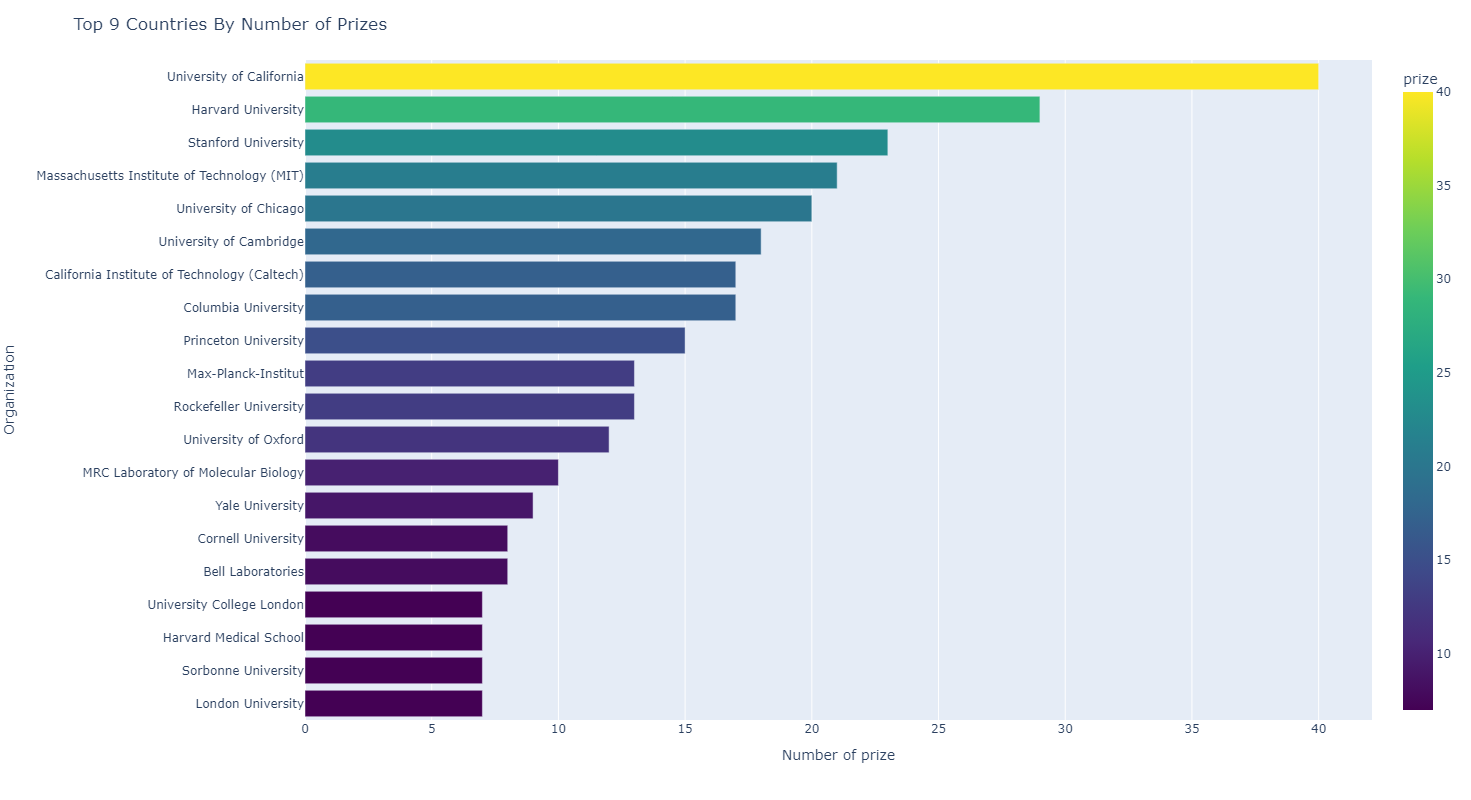

In [1638]:
bar = px.bar(Organ,
            y = 'organization_name', # index = category name
            x = 'prize',
            orientation='h',
            hover_name='birth_country_current',
            color_continuous_scale="viridis",
            color='prize')
bar.update_layout(title='Top 9 Countries By Number of Prizes',
                xaxis_title='Number of prize',
                yaxis_title='Organization',
                width=1600, 
                height=800,
                yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=True)
bar.show()

In [1639]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

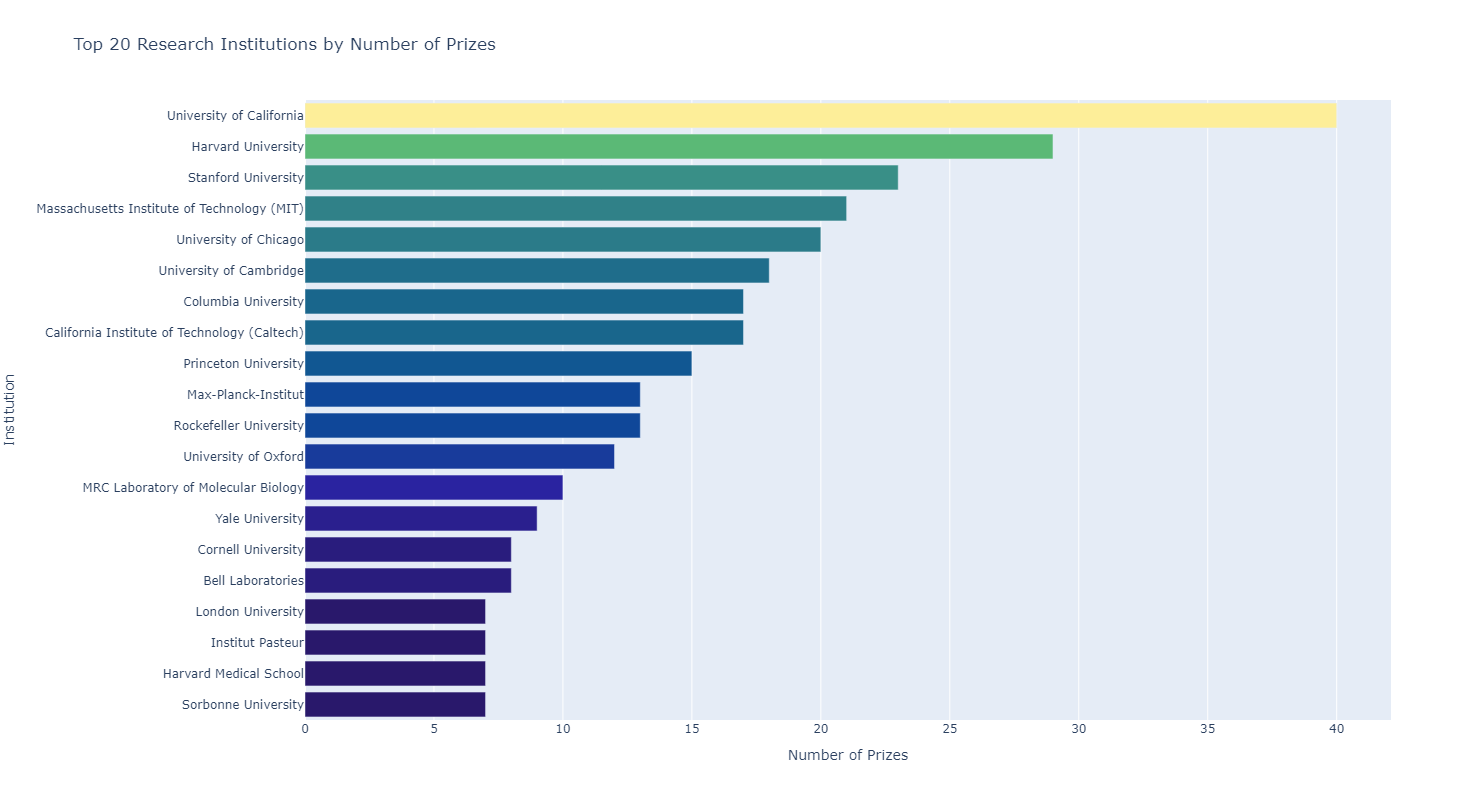

In [1640]:
org_bar = px.bar(x = top20_orgs.values,
                y = top20_orgs.index,
                orientation='h',
                color=top20_orgs.values,
                color_continuous_scale=px.colors.sequential.haline,
                title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                        yaxis_title='Institution',
                        width=1600, 
                        height=800,
                        coloraxis_showscale=False)
org_bar.show()

In [1641]:
print(f"Harvard University has had {top20_orgs.loc[top20_orgs.index=='Harvard University'].values[0]} prizes")
print(f"Columbia University has had {top20_orgs.loc[top20_orgs.index=='Columbia University'].values[0]} prizes")

Harvard University has had 29 prizes
Columbia University has had 17 prizes


# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [1642]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
top20_org_cities


Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

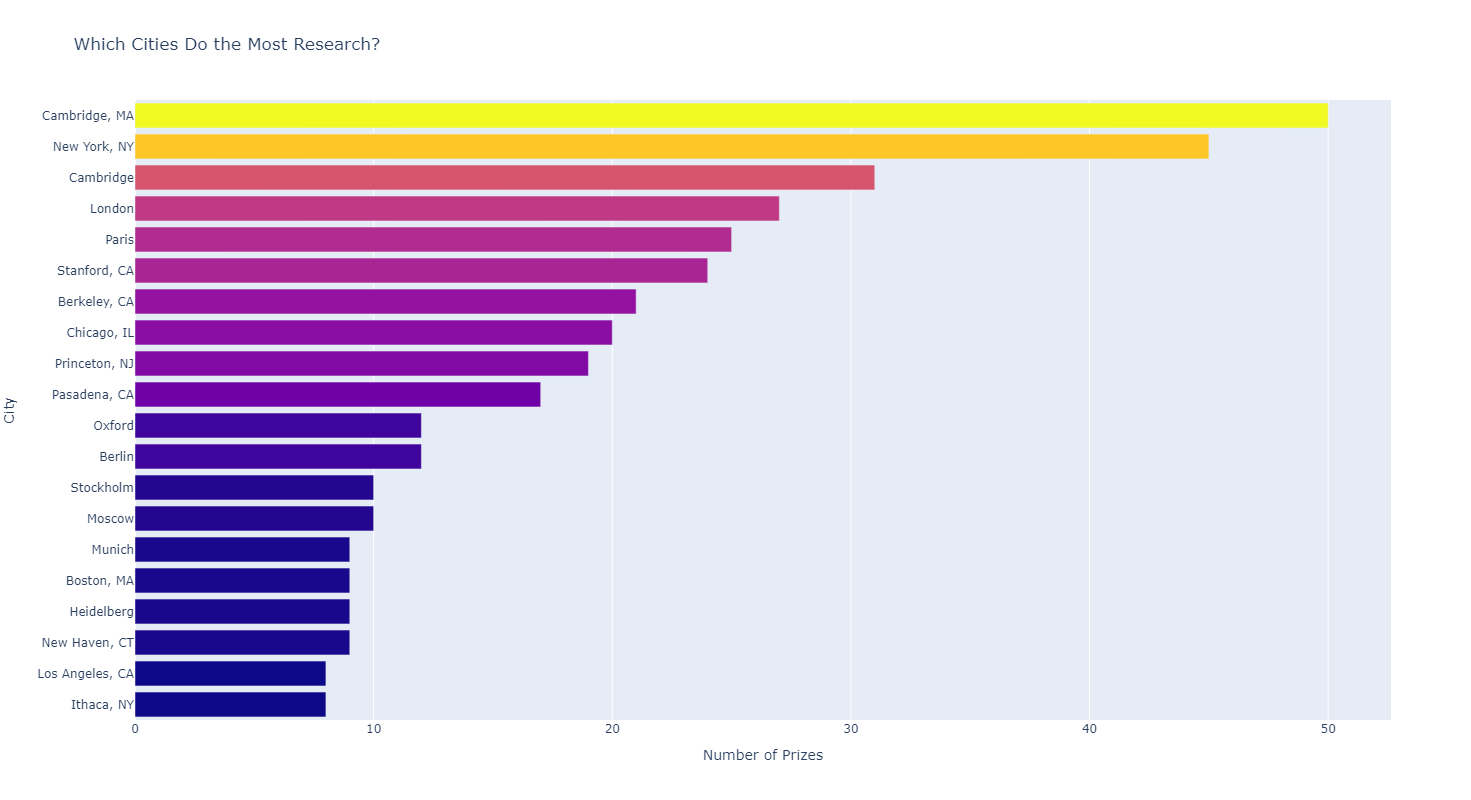

In [1643]:
city_bar2 = px.bar(x = top20_org_cities.values,
                    y = top20_org_cities.index,
                    orientation='h',
                    color=top20_org_cities.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='City',
                        width=1600, 
                        height=800,
                        coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [1644]:
top20_birth = df_data.birth_city.value_counts()[:20]
top20_birth.sort_values(ascending=True, inplace=True)
top20_birth

Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

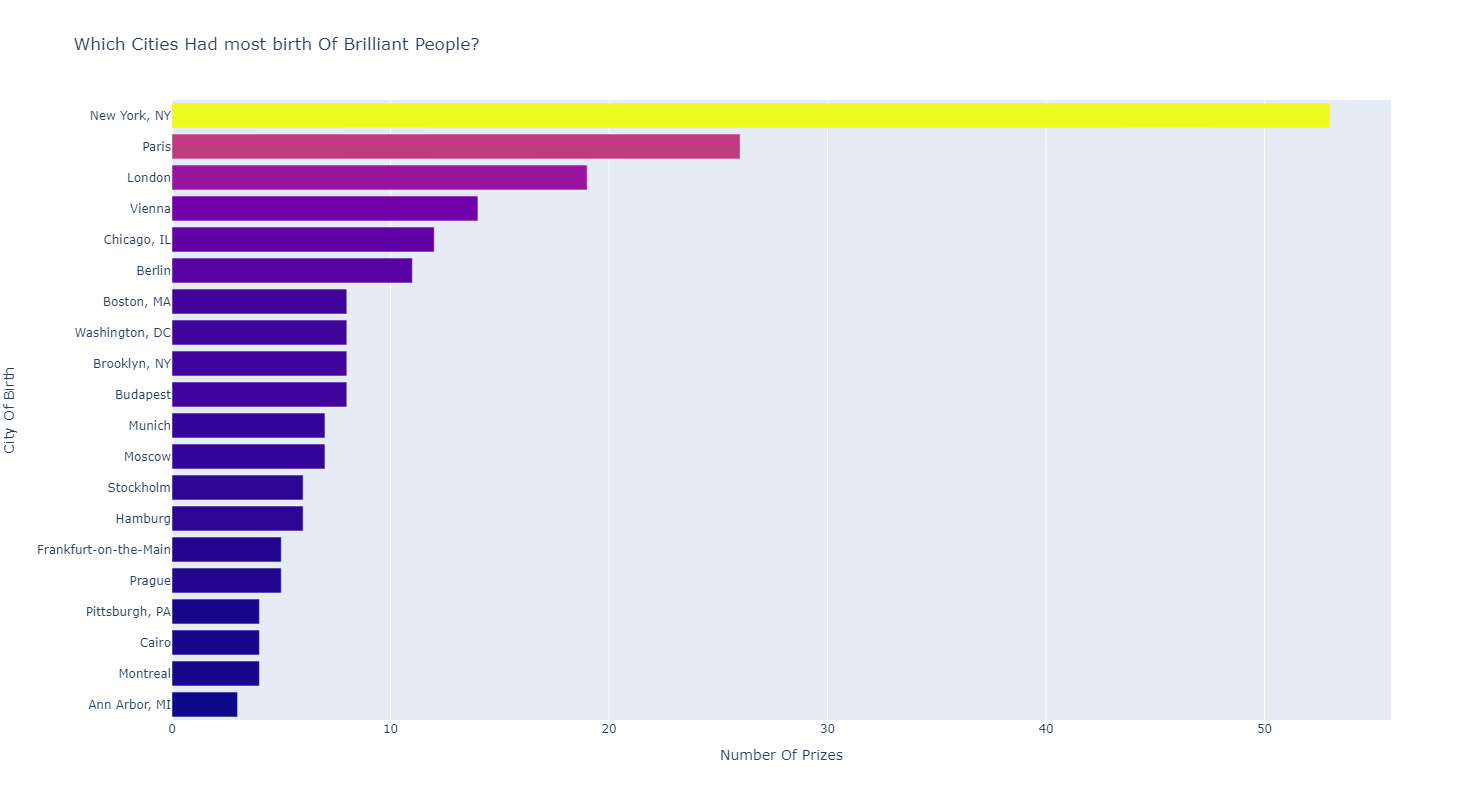

In [1645]:
city_bar3 = px.bar(x = top20_birth.values,
                    y = top20_birth.index,
                    orientation='h',
                    color=top20_birth.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Which Cities Had most birth Of Brilliant People?')

city_bar3.update_layout(xaxis_title='Number Of Prizes',
                        yaxis_title='City Of Birth',
                        width=1600, 
                        height=800,
                        coloraxis_showscale=False)
city_bar3.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [1646]:
group = df_data.groupby('organization_city', as_index=False)
group.head(187)

year   category                                           prize  \
0    1901  Chemistry               The Nobel Prize in Chemistry 1901   
2    1901   Medicine  The Nobel Prize in Physiology or Medicine 1901   
5    1901    Physics                 The Nobel Prize in Physics 1901   
6    1902  Chemistry               The Nobel Prize in Chemistry 1902   
8    1902   Medicine  The Nobel Prize in Physiology or Medicine 1902   
..    ...        ...                                             ...   
956  2020   Medicine  The Nobel Prize in Physiology or Medicine 2020   
957  2020   Medicine  The Nobel Prize in Physiology or Medicine 2020   
959  2020    Physics                 The Nobel Prize in Physics 2020   
960  2020    Physics                 The Nobel Prize in Physics 2020   
961  2020    Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
5    "in recognition of the extraordinary services ...         1/1   
6    "in recognition of the extraordinary services ...         1/1   
8    "for his work on malaria, by which he has show...         1/1   
..                                                 ...         ...   
956           “for the discovery of Hepatitis C virus”         1/3   
957           “for the discovery of Hepatitis C virus”         1/3   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
2      Individual        Emil Adolf von Behring 1854-03-15   
5      Individual        Wilhelm Conrad Röntgen 1845-03-27   
6      Individual          Hermann Emil Fischer 1852-10-09   
8      Individual                   Ronald Ross 1857-05-13   
..            ...                           ...        ...   
956    Individual               Harvey J. Alter 1935-09-12   
957    Individual              Michael Houghton 1949-07-02   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
2           Hansdorf (Lawice)          Prussia (Poland)   
5          Lennep (Remscheid)         Prussia (Germany)   
6                  Euskirchen         Prussia (Germany)   
8                      Almora                     India   
..                        ...                       ...   
956              New York, NY  United States of America   
957                       NaN            United Kingdom   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex              organization_name  \
0                 Netherlands    Male              Berlin University   
2                      Poland    Male             Marburg University   
5                     Germany    Male              Munich University   
6                     Germany    Male              Berlin University   
8                       India    Male      University College London   
..                        ...     ...                            ...   
956  United States of America    Male  National Institutes of Health   
957            United Kingdom    Male          University of Alberta   
959  United States of America  Female       University of California   
960                   Germany    Male       University of California   
961            United Kingdom    Male           Unive

In [1647]:
country_city_org = df_data.groupby(by=['organization_country', 
                                        'organization_city', 
                                        'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [1648]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                    )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    width=1600, 
                    height=1600,
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [1649]:
age = df_data.year.subtract(pd.Series(df_data.birth_date).dt.year)
df_data['winning_age'] = age

In [1650]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

In [1651]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [1652]:
young = df_data.sort_values('winning_age', ascending=True)
young[['winning_age','full_name','prize']]

winning_age                                          full_name  \
885        17.00                                   Malala Yousafzai   
85         25.00                             William Lawrence Bragg   
932        25.00                                        Nadia Murad   
305        31.00                               Tsung-Dao (T.D.) Lee   
171        31.00                          Paul Adrien Maurice Dirac   
..           ...                                                ...   
860          NaN                                European Union (EU)   
873          NaN  Organisation for the Prohibition of Chemical W...   
897          NaN                          National Dialogue Quartet   
919          NaN  International Campaign to Abolish Nuclear Weap...   
958          NaN                         World Food Programme (WFP)   

                               prize  
885       The Nobel Peace Prize 2014  
85   The Nobel Prize in Physics 1915  
932       The Nobel Peace Prize 2018  
305  The Nobel Prize in Physics 1957  
171  The Nobel Prize in Physics 1933  
..                               ...  
860       The Nobel Peace Prize 2012  
873       The Nobel Peace Prize 2013  
897       The Nobel Peace Prize 2015  
919       The Nobel Peace Prize 2017  
958       The Nobel Peace Prize 2020  

[962 rows x 3 columns]

In [1653]:
old = df_data.sort_values('winning_age', ascending=False)
old[['winning_age','full_name','prize']]

winning_age                                          full_name  \
937        97.00                                    John Goodenough   
933        96.00                                      Arthur Ashkin   
794        90.00                                     Leonid Hurwicz   
961        89.00                                      Roger Penrose   
856        89.00                                   Lloyd S. Shapley   
..           ...                                                ...   
860          NaN                                European Union (EU)   
873          NaN  Organisation for the Prohibition of Chemical W...   
897          NaN                          National Dialogue Quartet   
919          NaN  International Campaign to Abolish Nuclear Weap...   
958          NaN                         World Food Programme (WFP)   

                                                 prize  
937                  The Nobel Prize in Chemistry 2019  
933                    The Nobel Prize in Physics 2018  
794  The Sveriges Riksbank Prize in Economic Scienc...  
961                    The Nobel Prize in Physics 2020  
856  The Sveriges Riksbank Prize in Economic Scienc...  
..                                                 ...  
860                         The Nobel Peace Prize 2012  
873                         The Nobel Peace Prize 2013  
897                         The Nobel Peace Prize 2015  
919                         The Nobel Peace Prize 2017  
958                         The Nobel Peace Prize 2020  

[962 rows x 3 columns]

In [1654]:
mean = df_data.winning_age.mean()
mean

59.94860813704497

In [1655]:
df_data.describe()

year  share_pct  winning_age
count   962.00     962.00       934.00
mean  1,971.82       0.63        59.95
std      33.81       0.29        12.62
min   1,901.00       0.25        17.00
25%   1,948.00       0.33        51.00
50%   1,977.00       0.50        60.00
75%   2,001.00       1.00        69.00
max   2,020.00       1.00        97.00

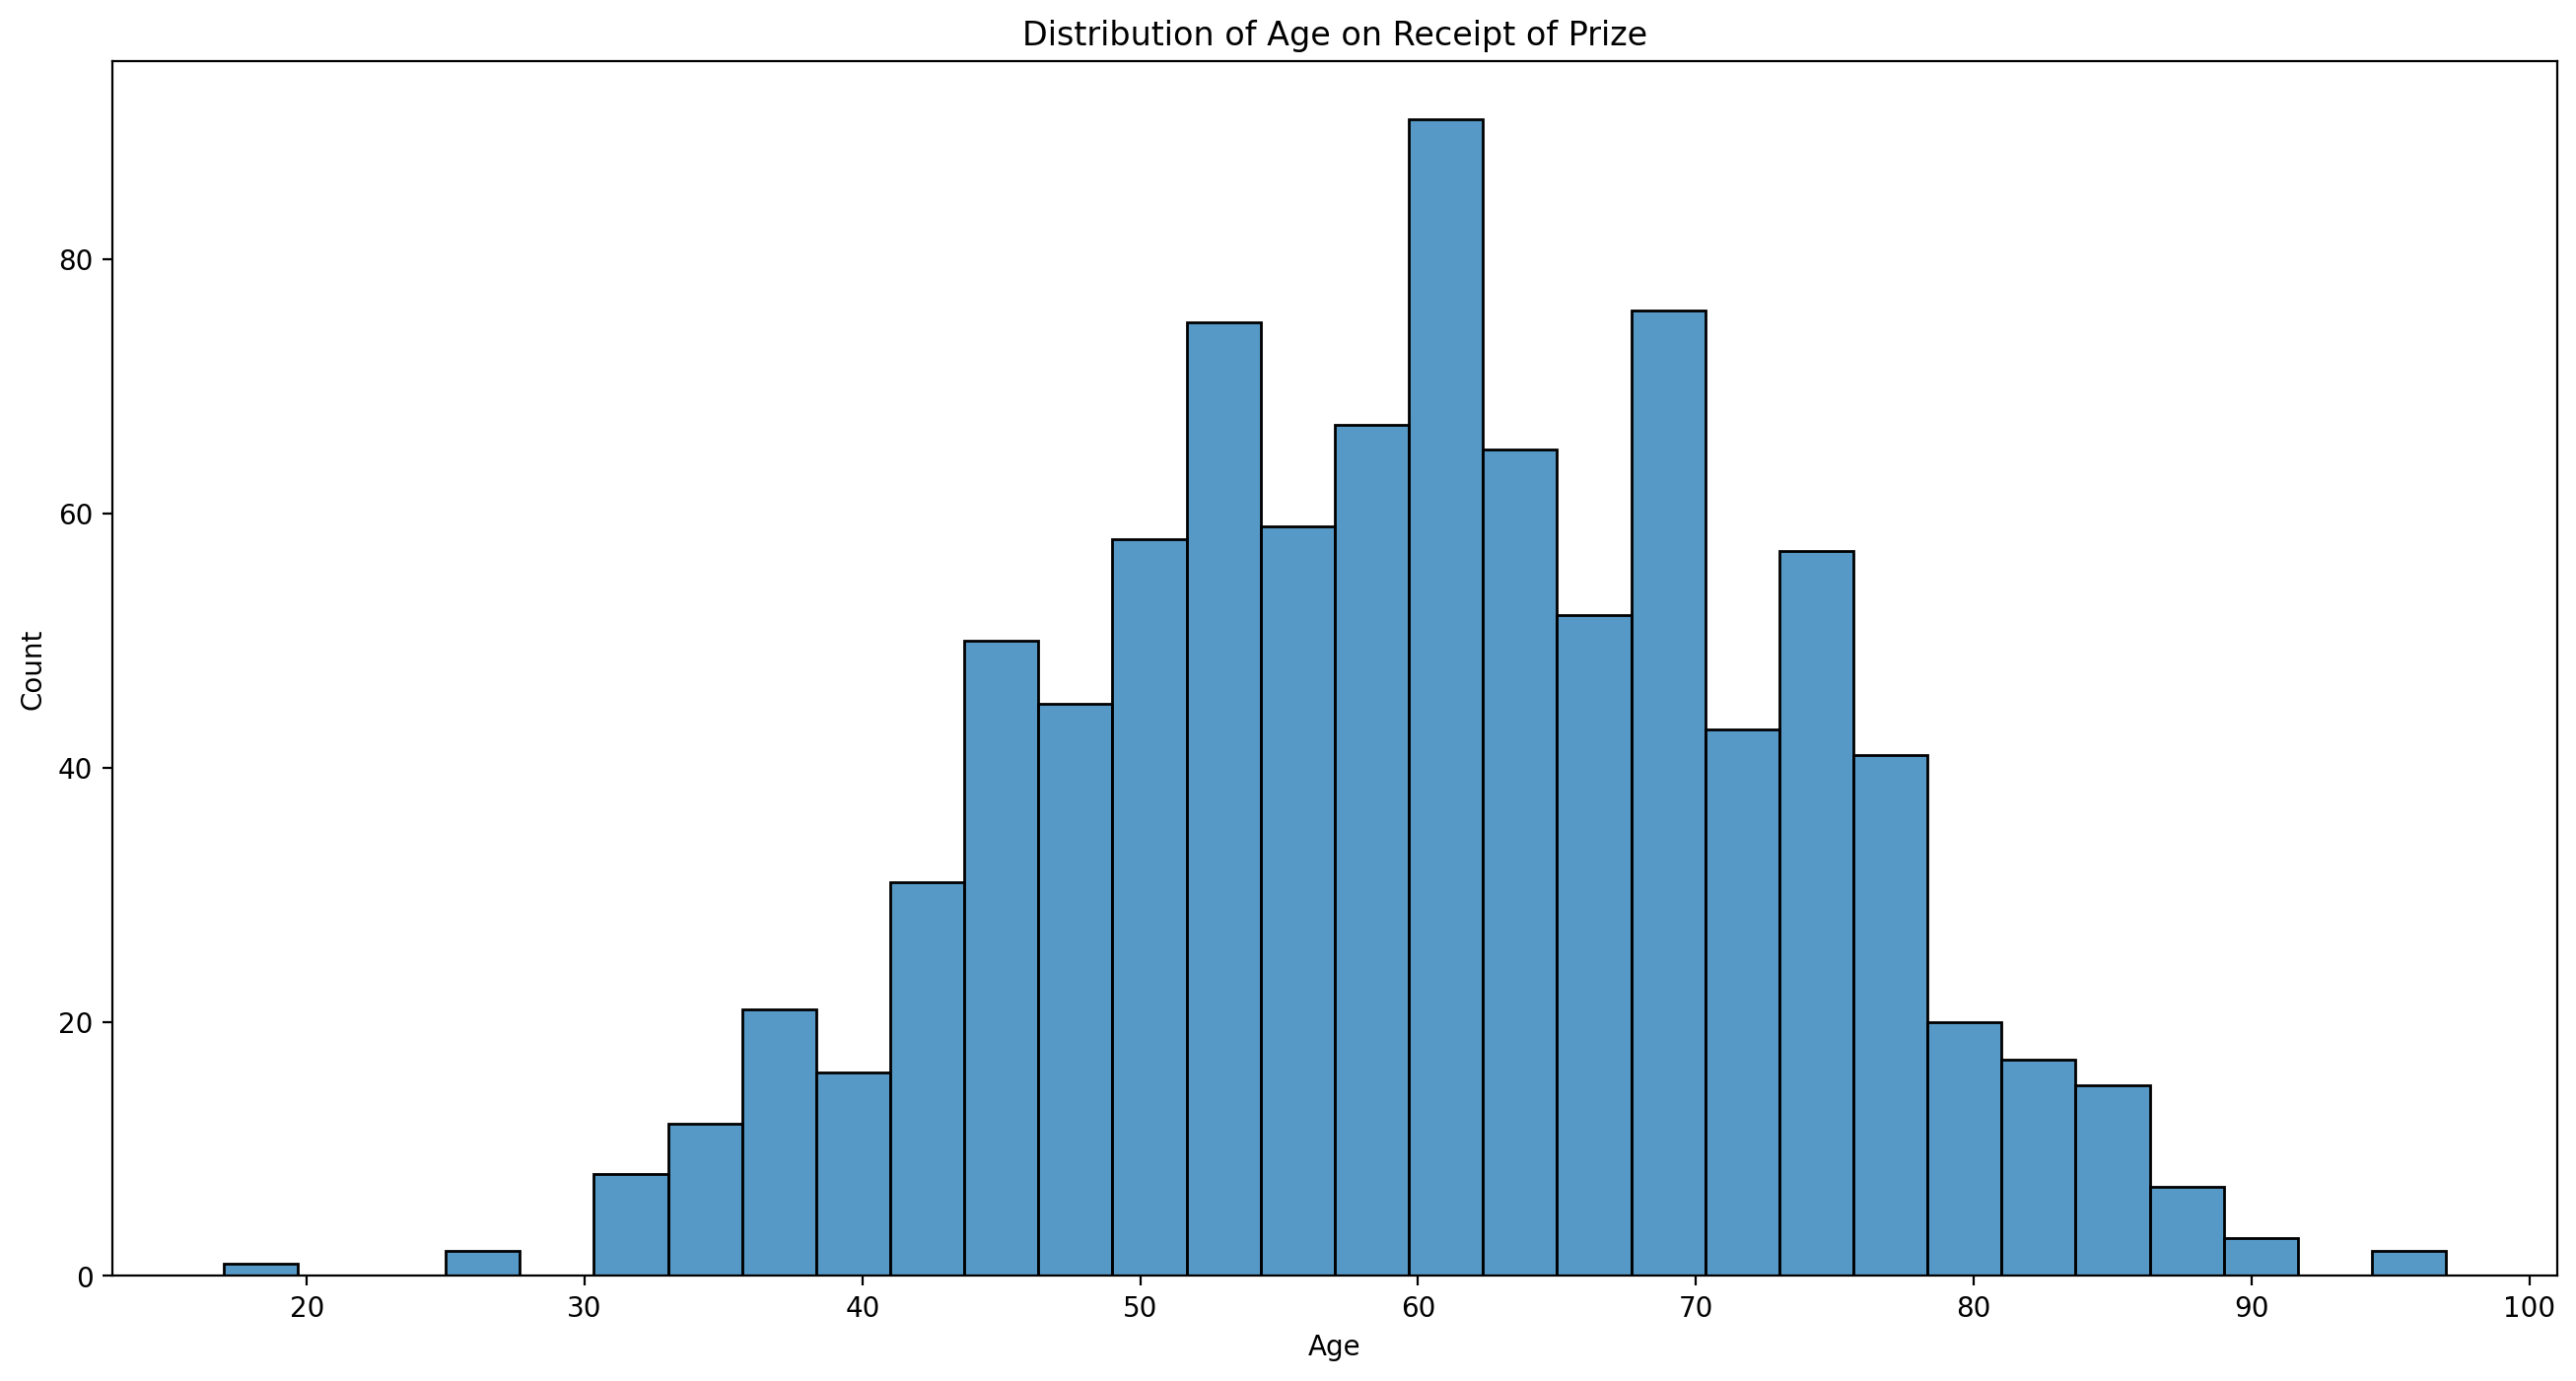

In [1656]:
plt.figure(figsize=(16, 8), dpi=200)
sns.histplot(data=df_data,
        x=df_data.winning_age,
        bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

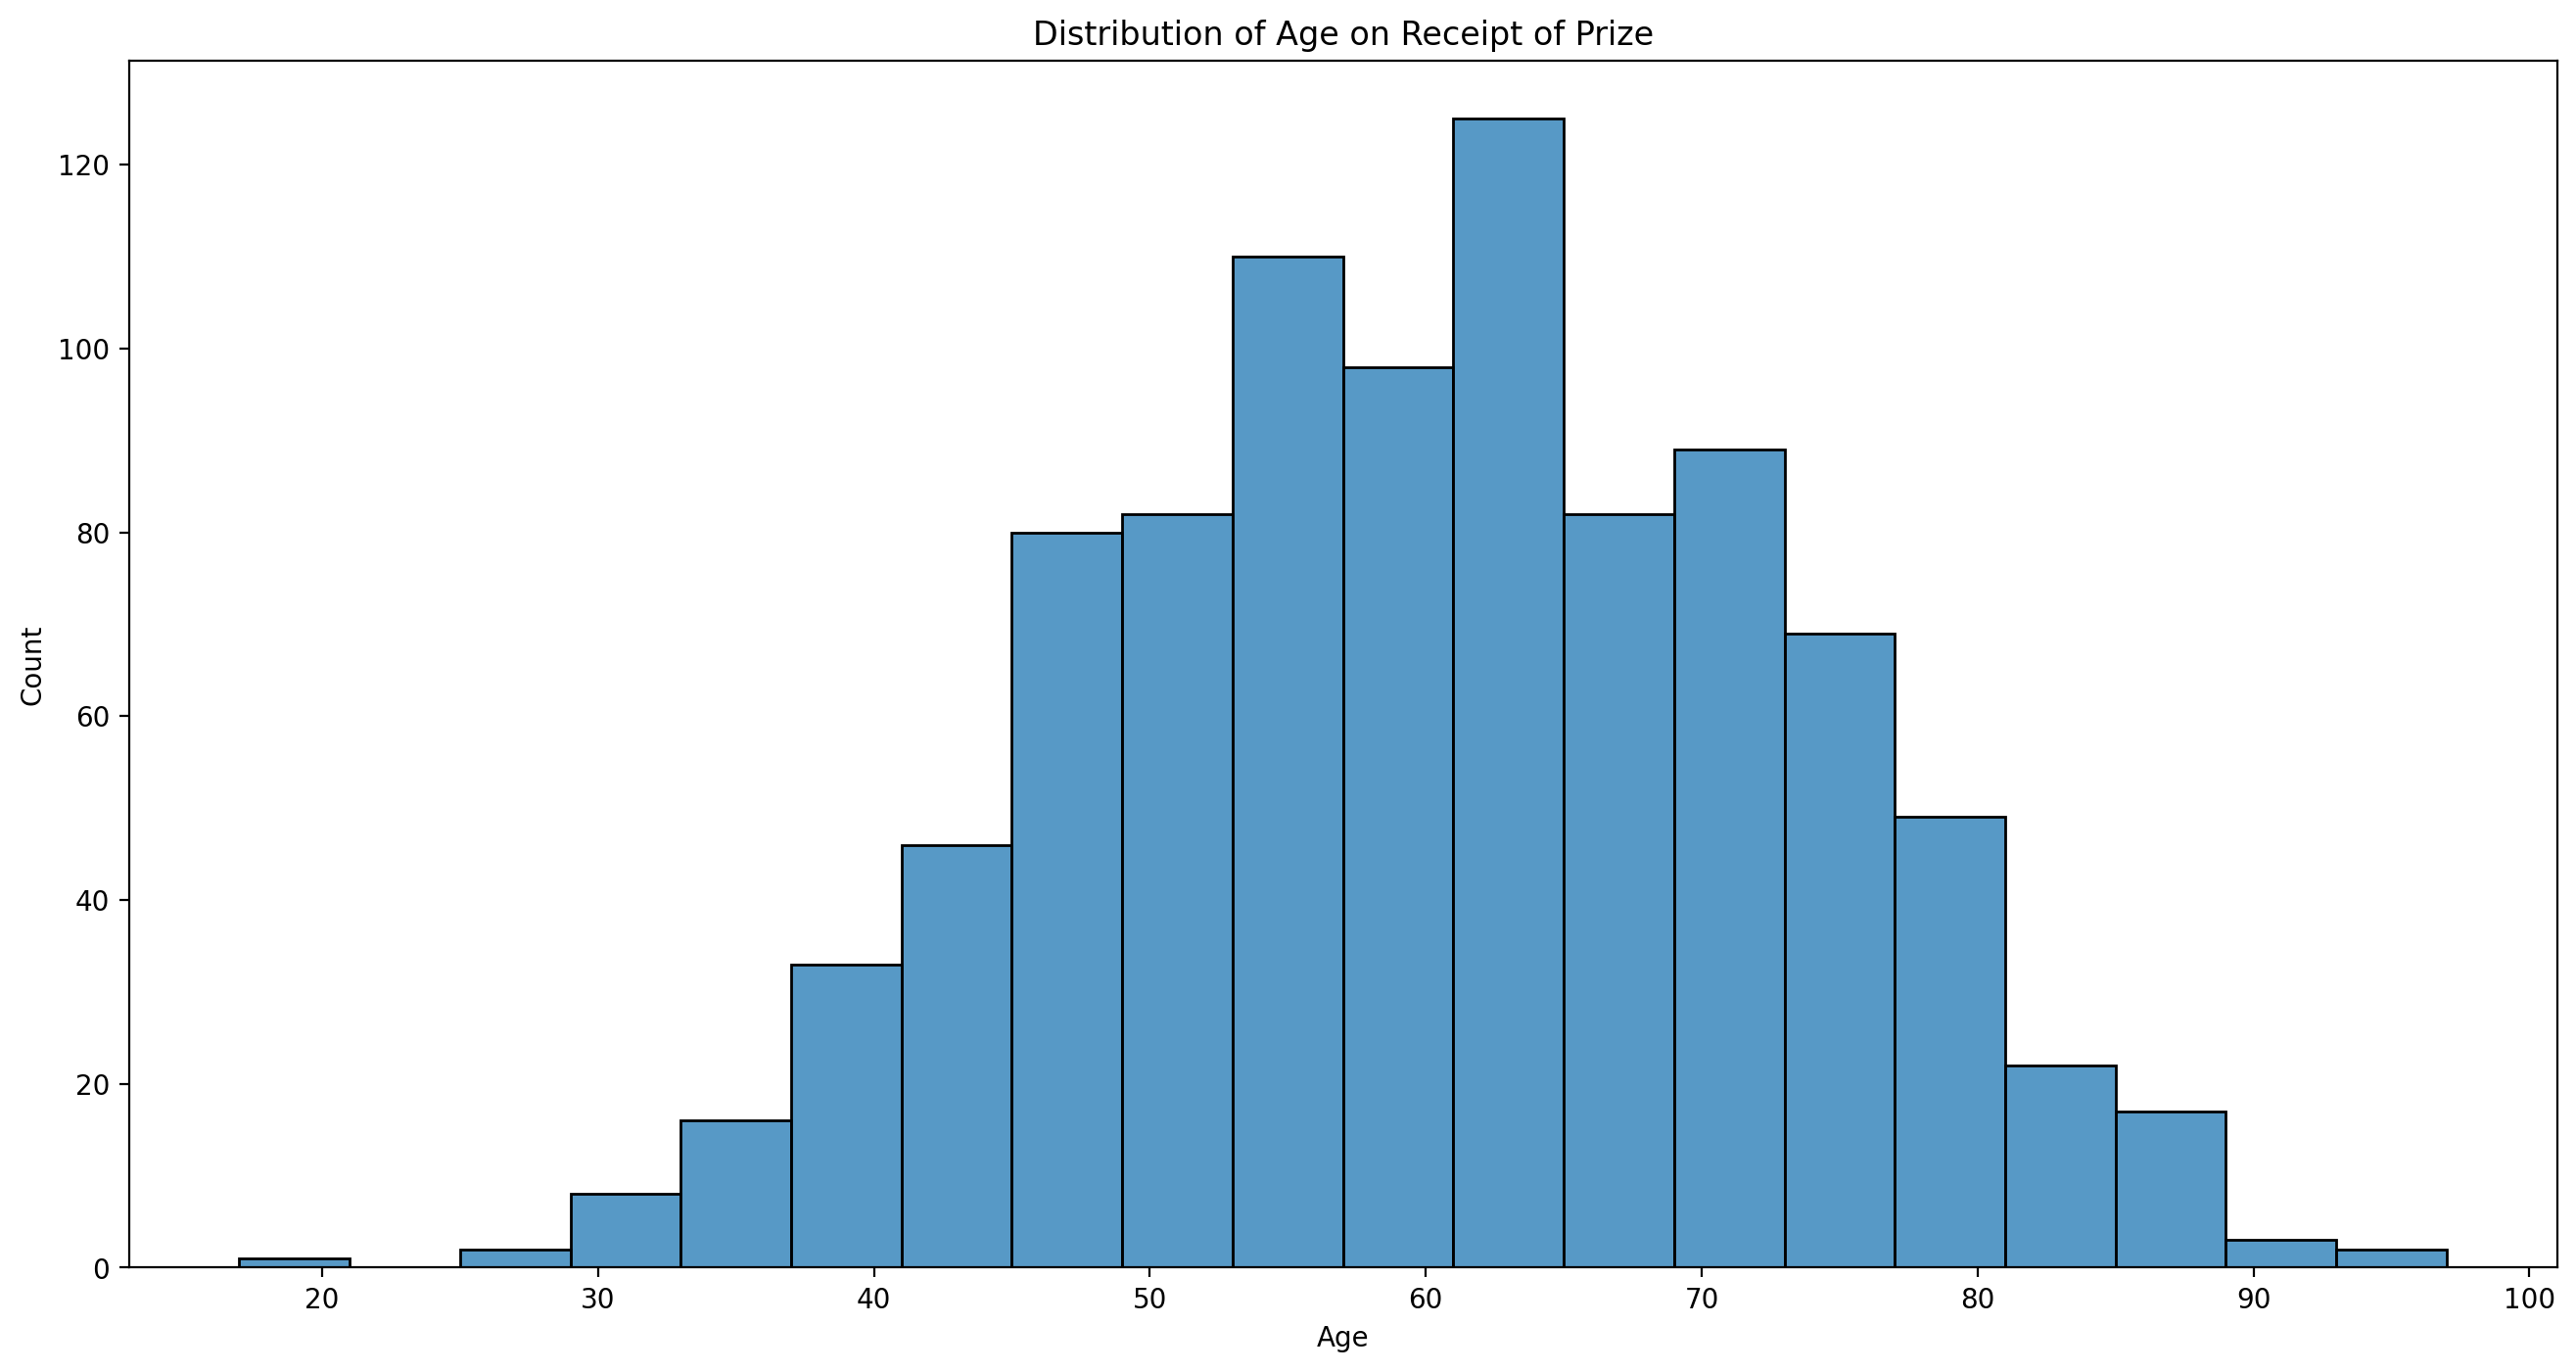

In [1657]:
plt.figure(figsize=(16, 8), dpi=200)
sns.histplot(data=df_data,
        x=df_data.winning_age,
        bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

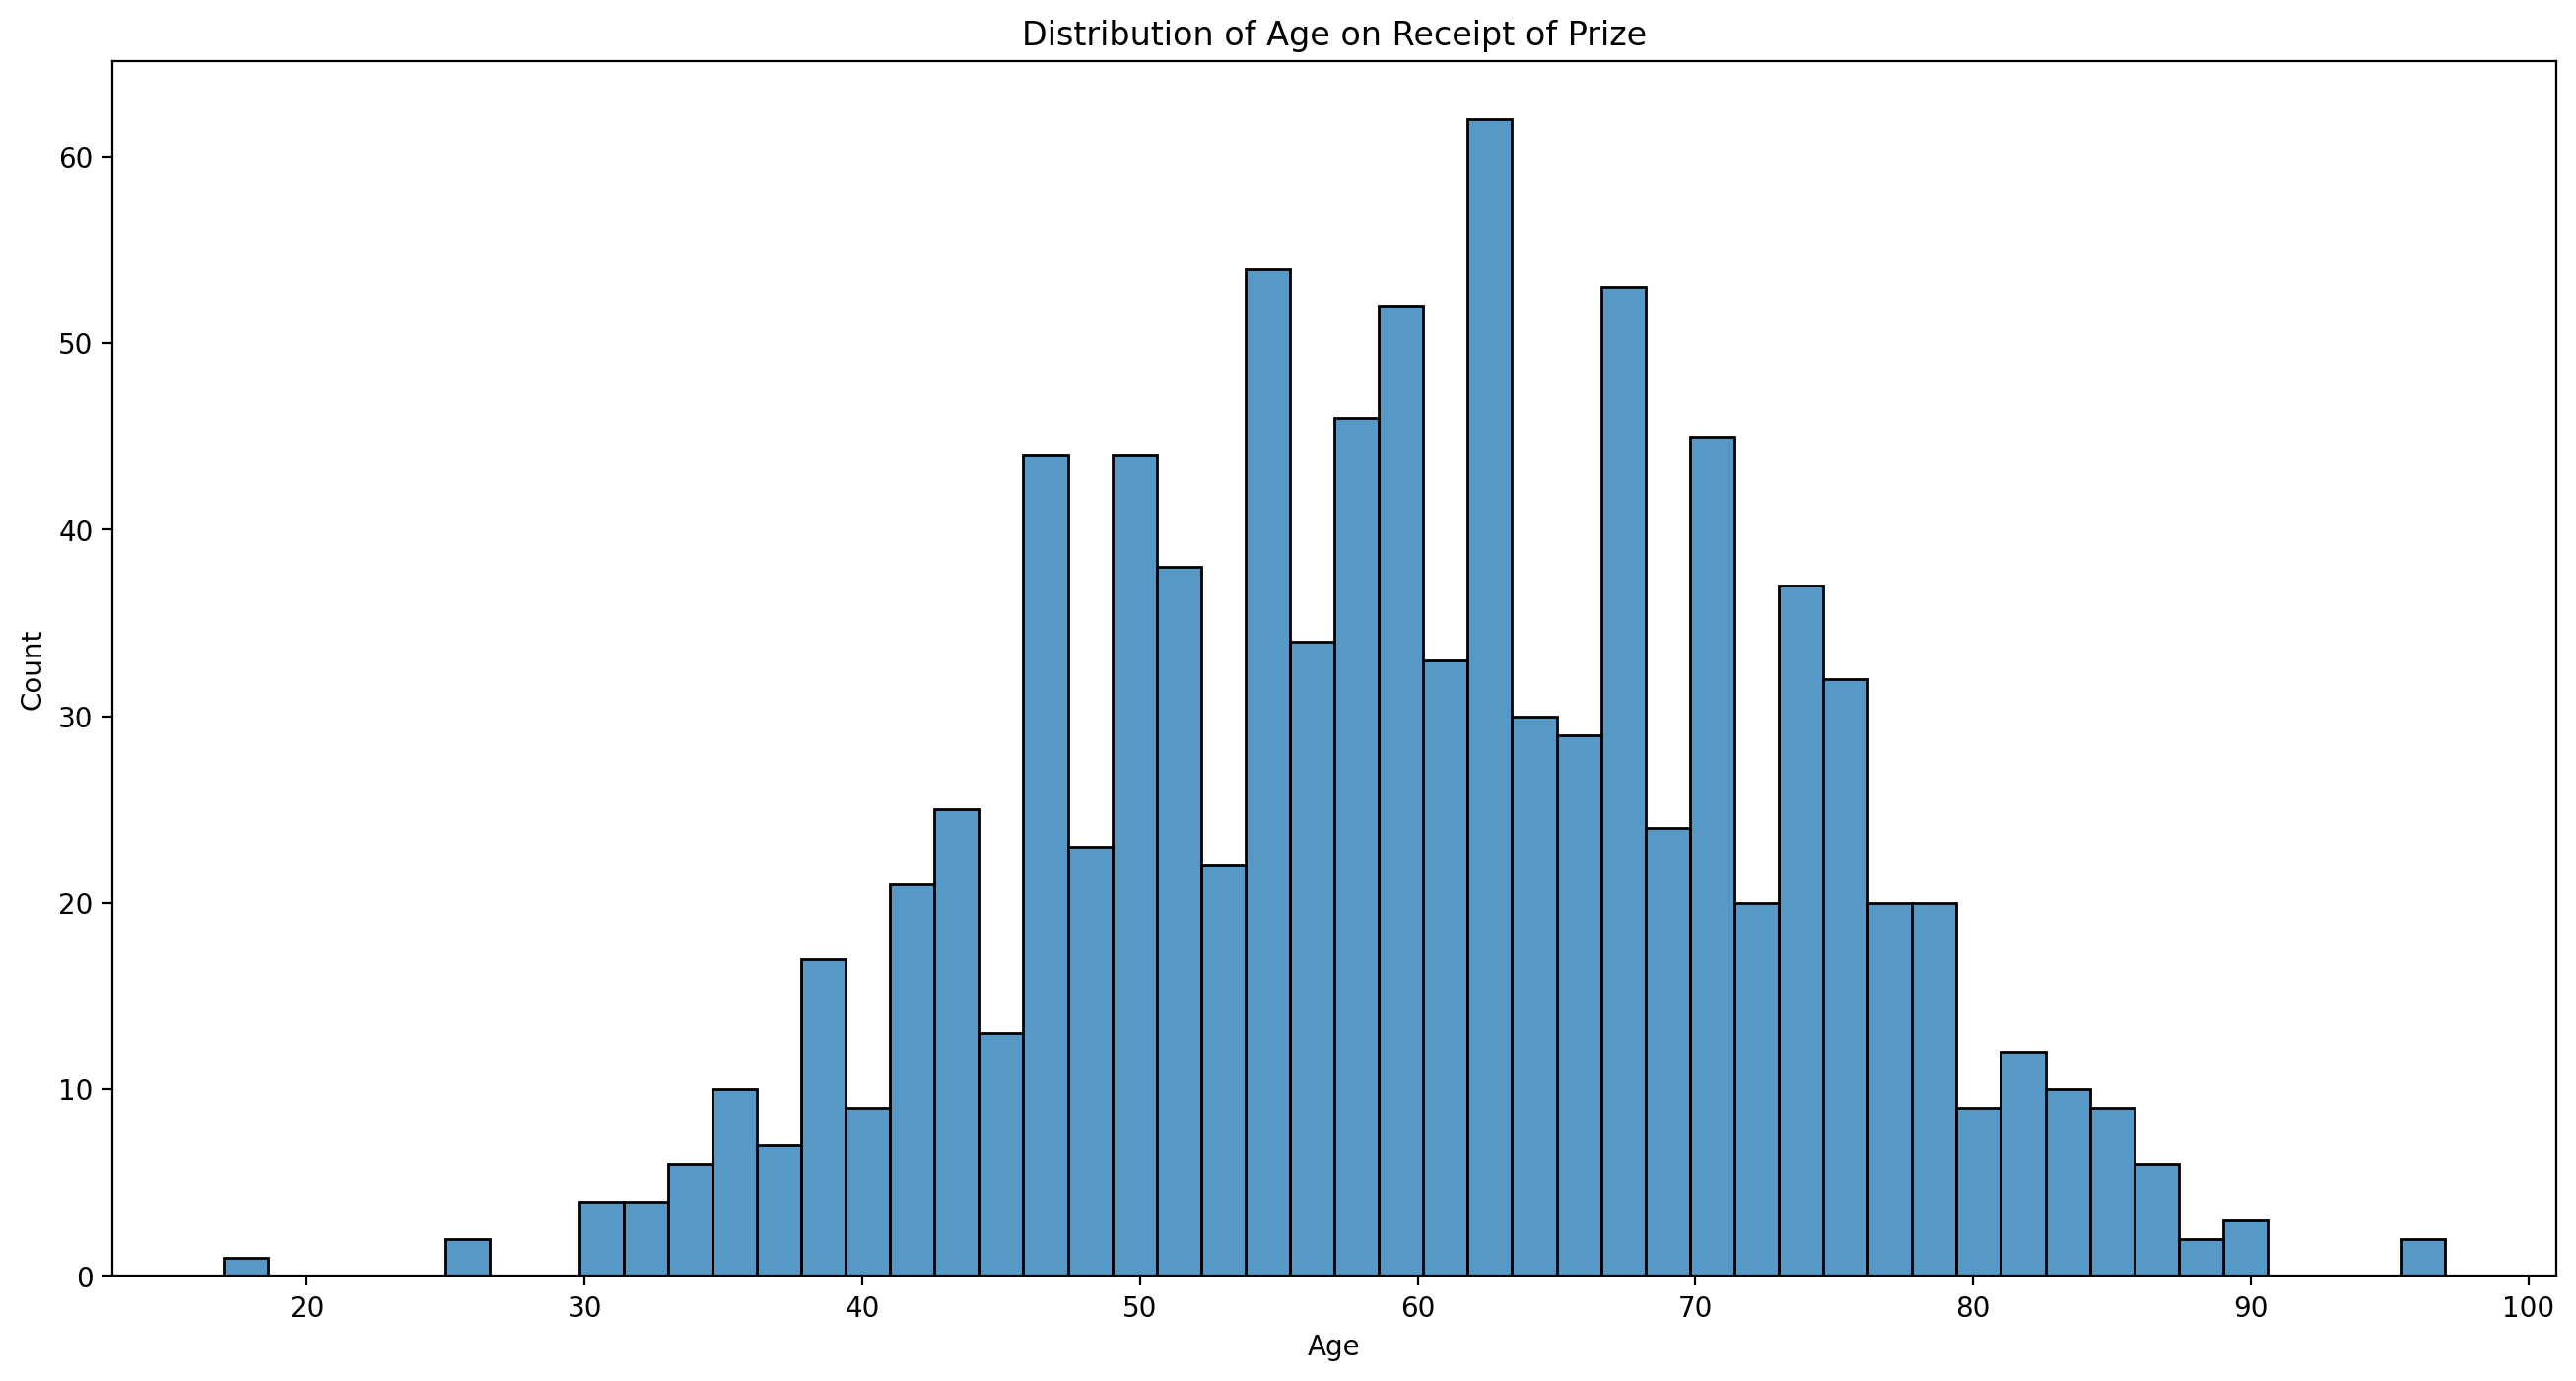

In [1658]:
plt.figure(figsize=(16, 8), dpi=200)
sns.histplot(data=df_data,
        x=df_data.winning_age,
        bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


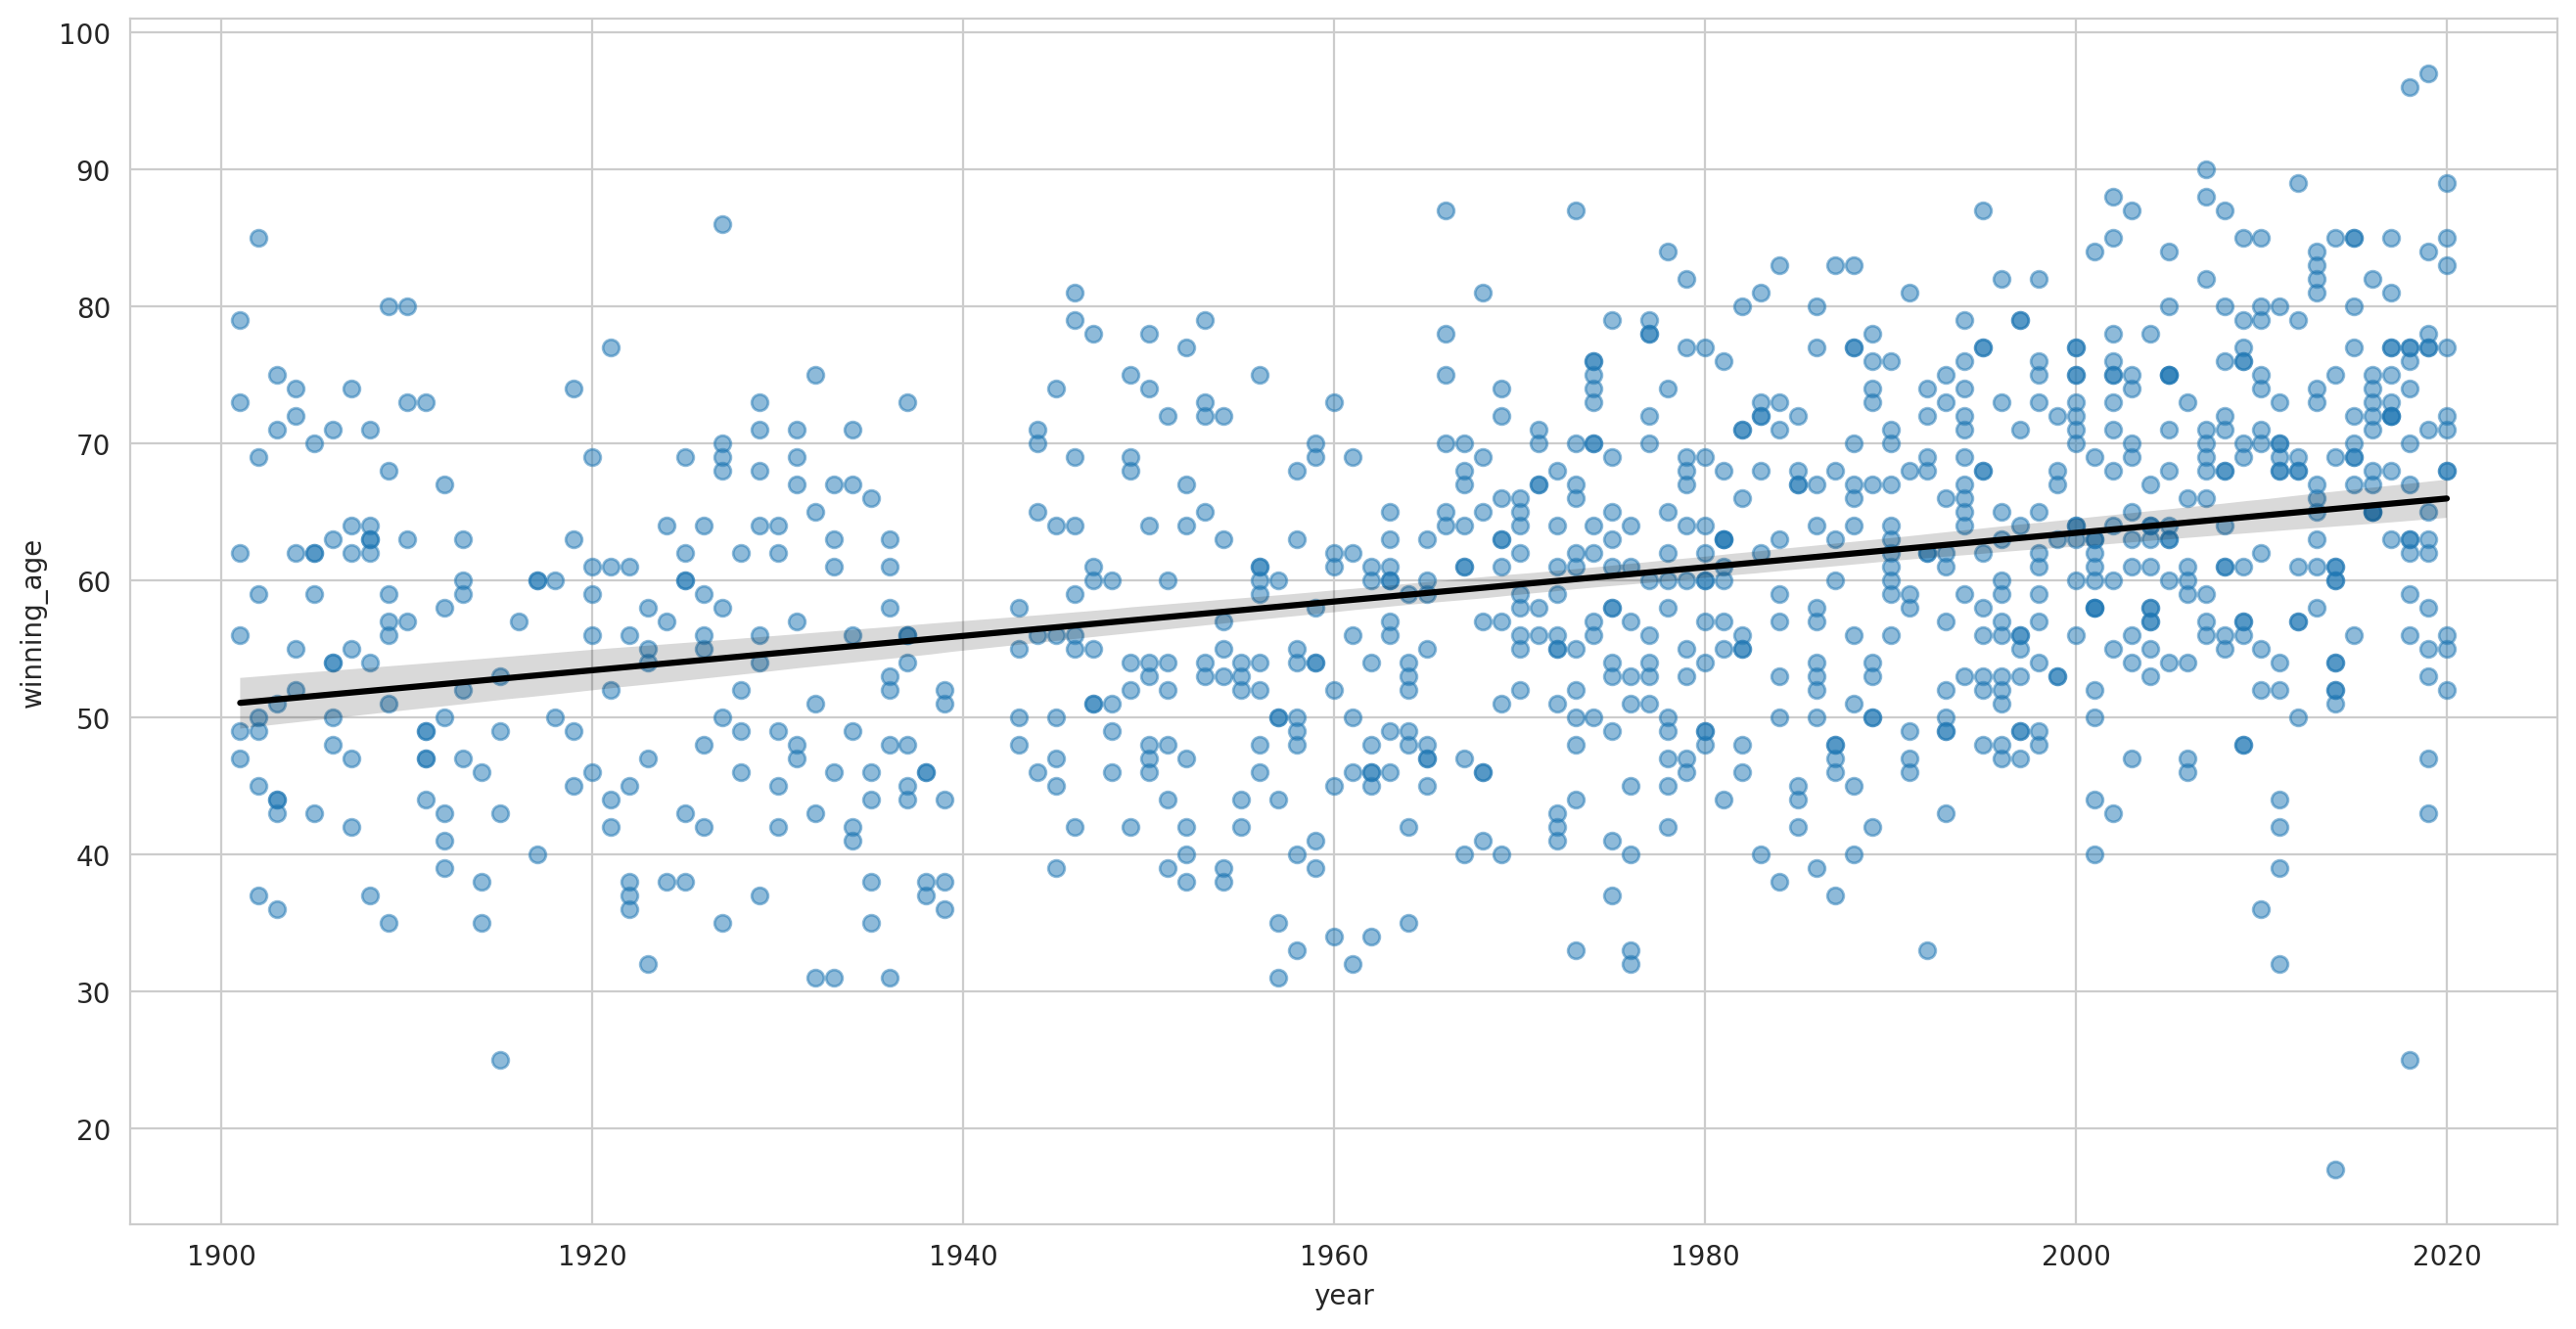

In [1659]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=False,
                scatter_kws = {'alpha': 0.5},
                line_kws={'color': 'black'})

plt.show()

In [1660]:
# Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

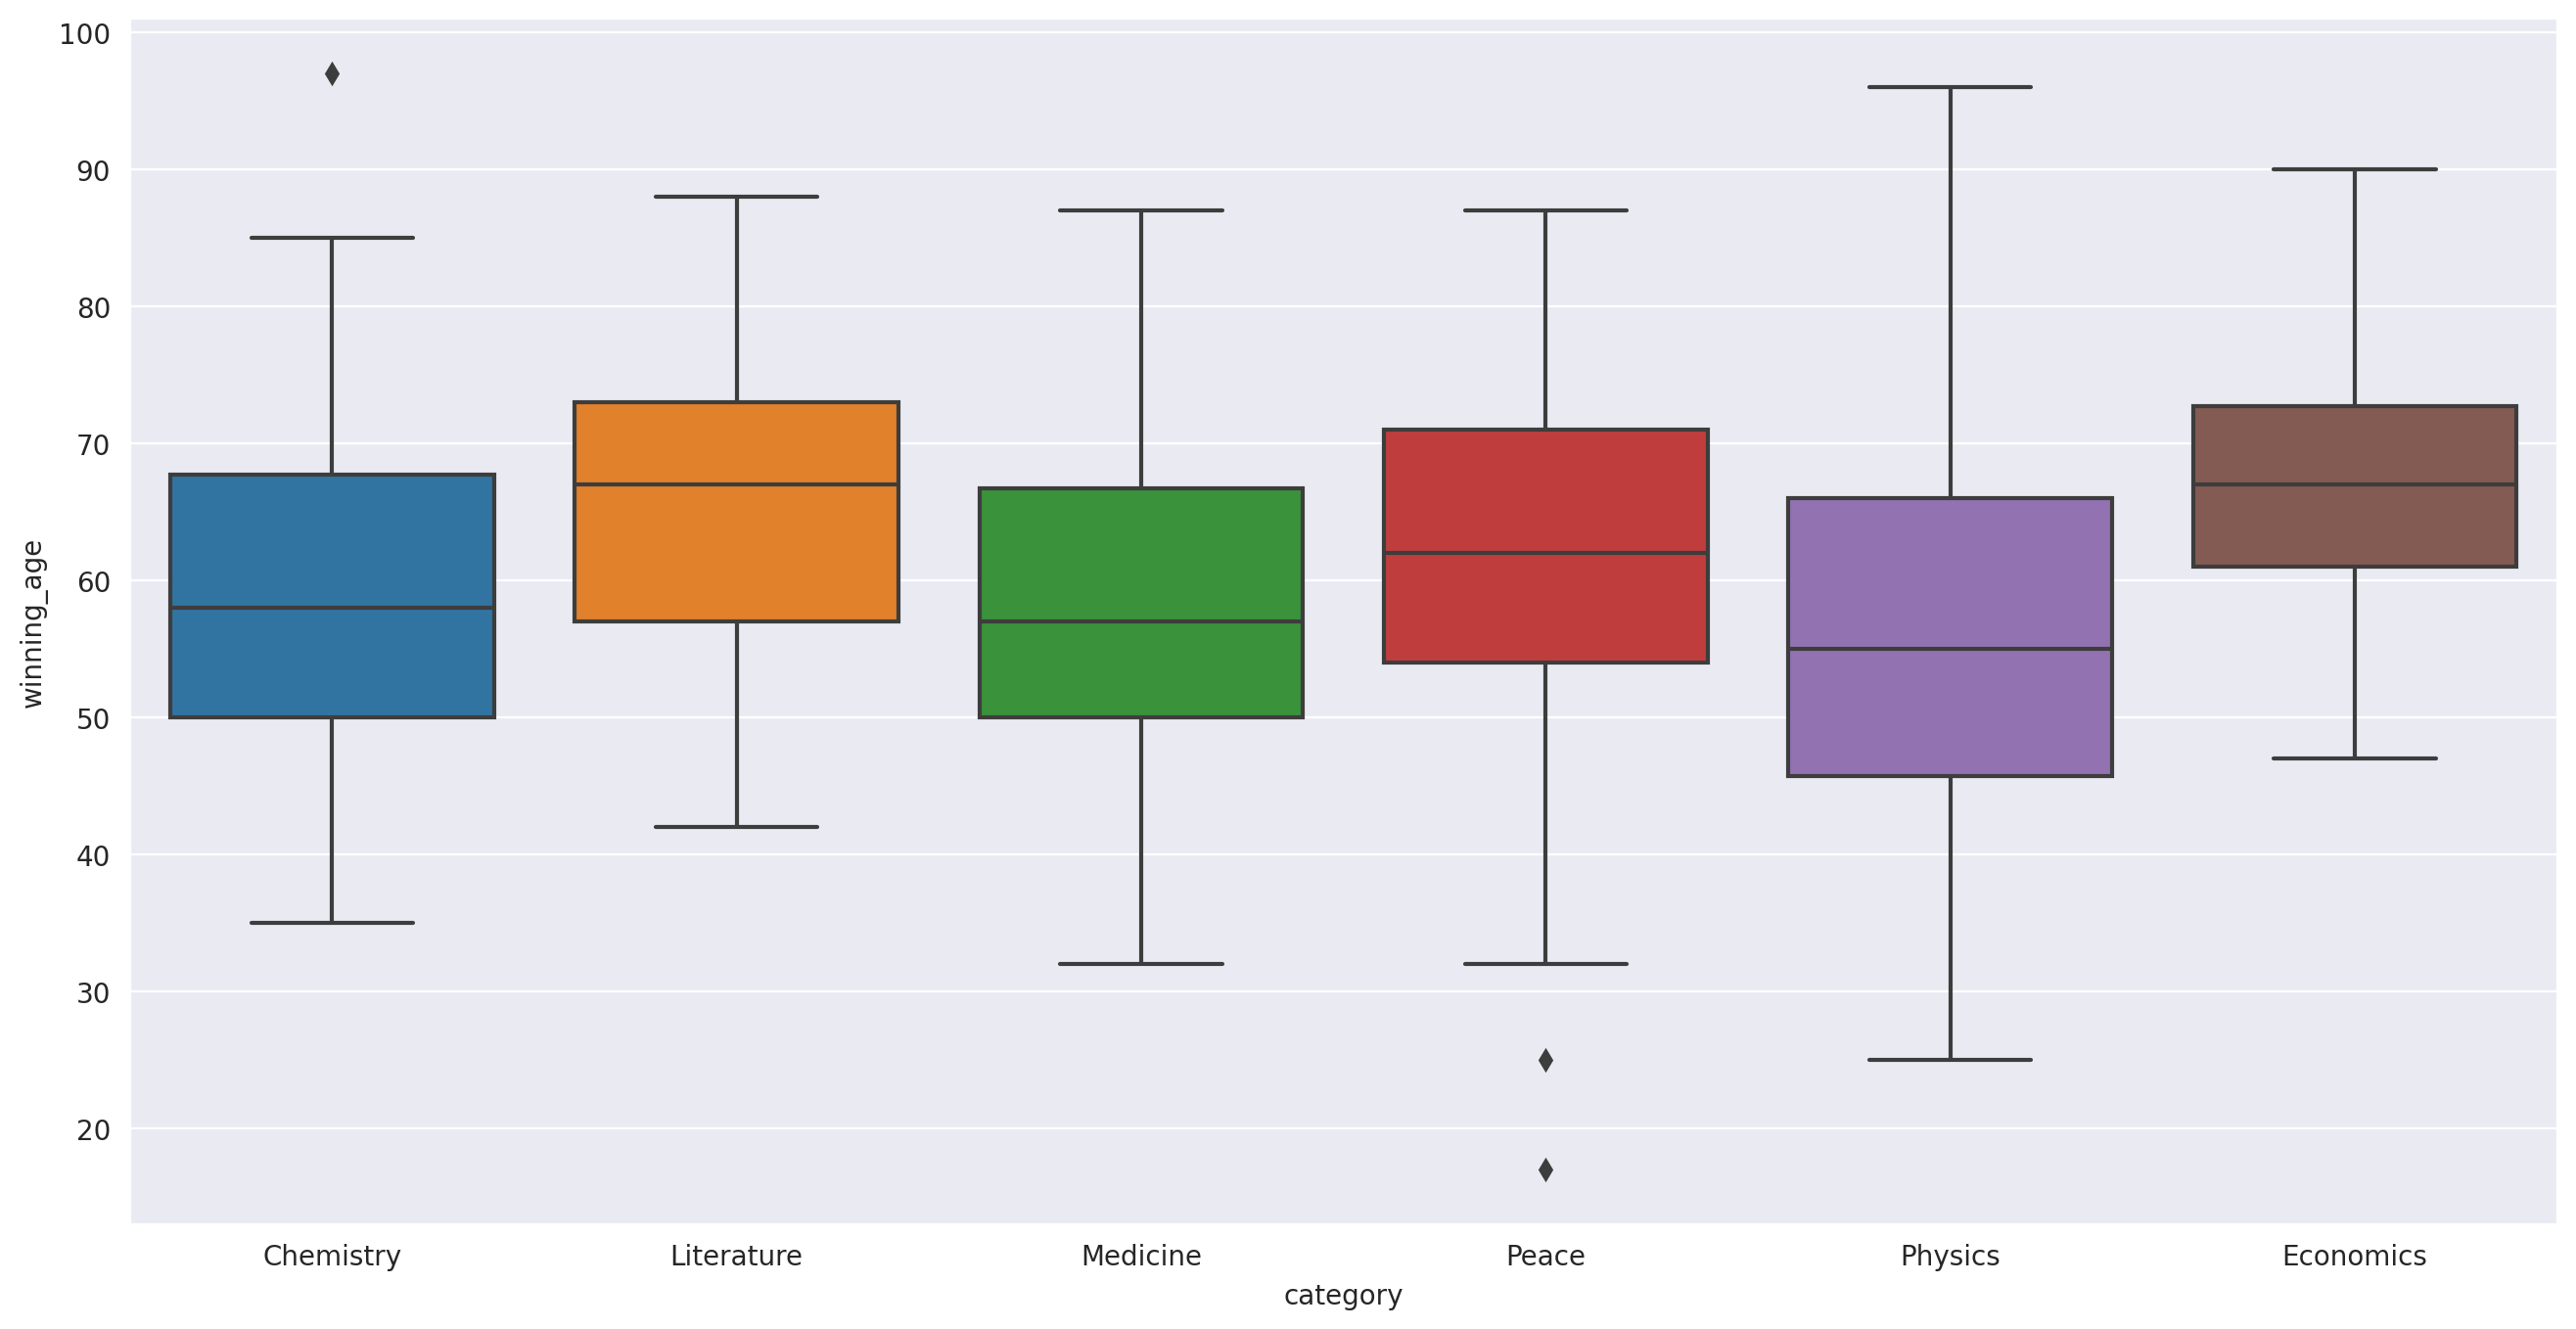

In [1661]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


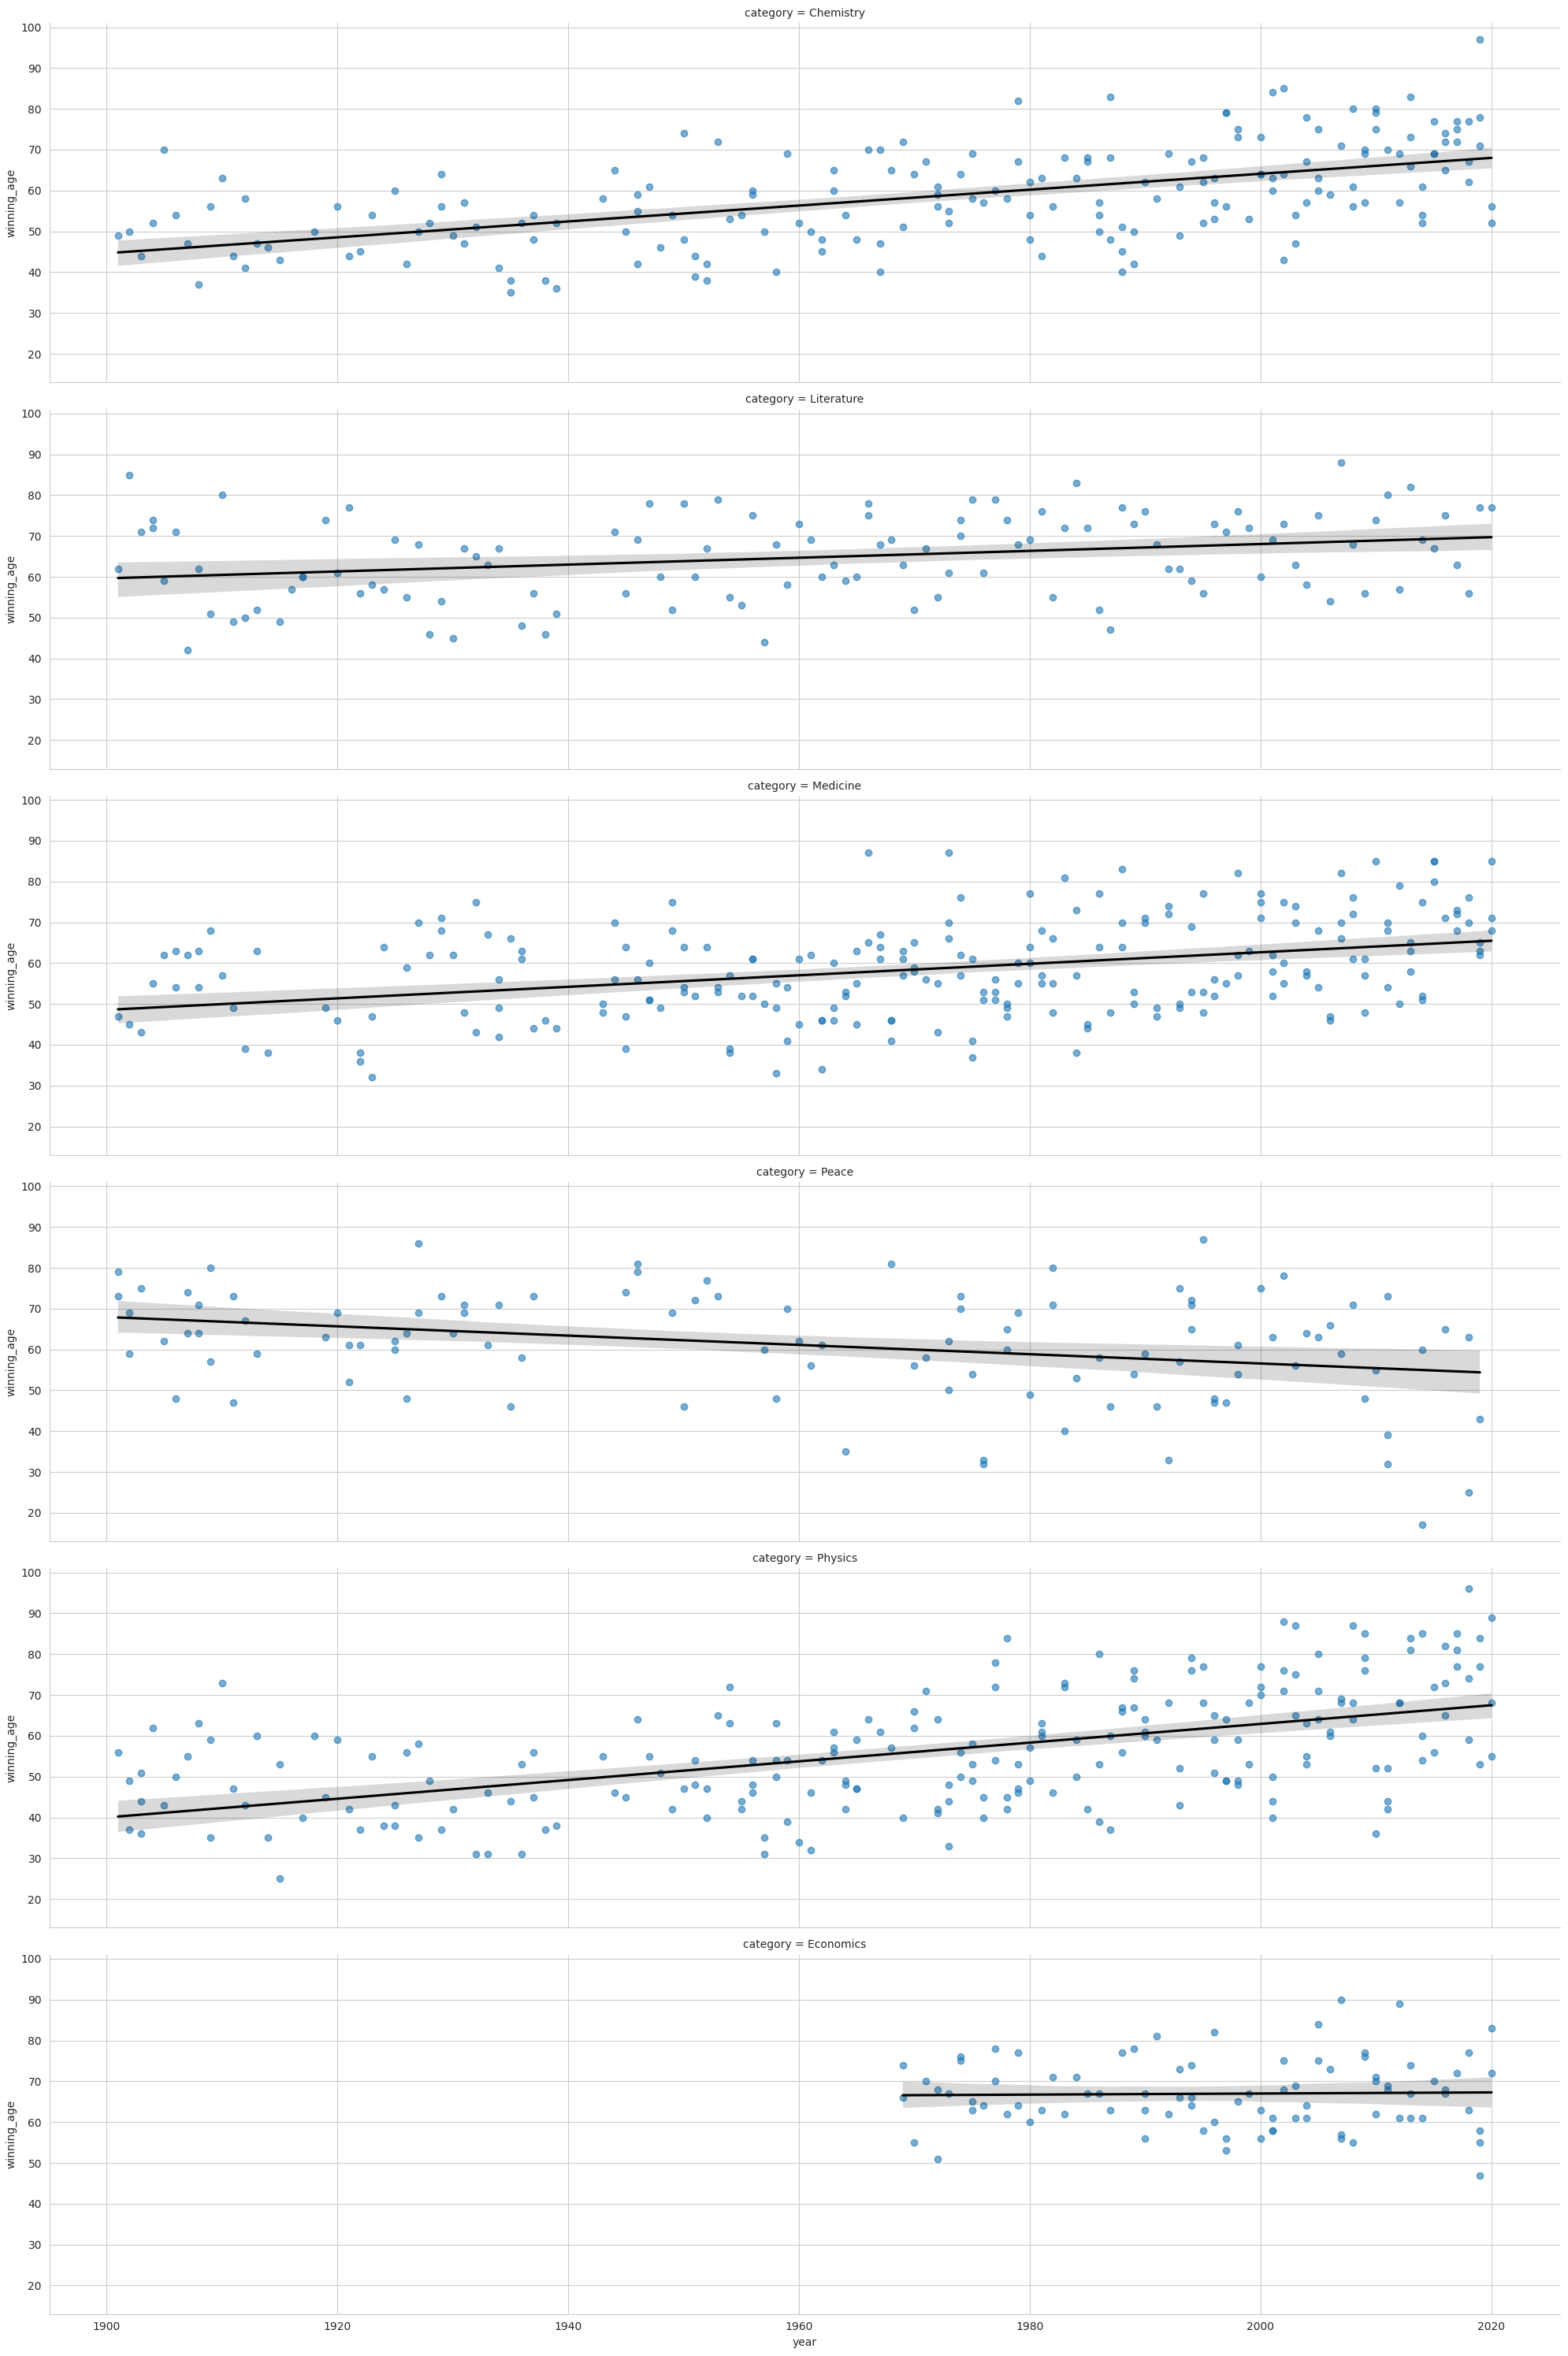

In [1662]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
                x='year', 
                y='winning_age',
                row = 'category',
                lowess=False,
                aspect=4,
                scatter_kws = {'alpha': 0.6},
                line_kws = {'color': 'black'})

plt.show()

In [1663]:
print('The age range from 55 to 68 years of age from 1900 to 2020 for Chemistry\nThe age range from 60 to 70 years of age from 1900 to 2020 for Literature\nThe age range from 48 to 56 years of age from 1900 to 2020 for Medicine\nThe age range from 68 to 54 years of age from 1900 to 2020 for Peace\nThe age range from 40 to 68 years of age from 1900 to 2020 for Physics\nThe age range from 67 to 68 years of age from 1966 to 2020 for Economics')

The age range from 55 to 68 years of age from 1900 to 2020 for Chemistry
The age range from 60 to 70 years of age from 1900 to 2020 for Literature
The age range from 48 to 56 years of age from 1900 to 2020 for Medicine
The age range from 68 to 54 years of age from 1900 to 2020 for Peace
The age range from 40 to 68 years of age from 1900 to 2020 for Physics
The age range from 67 to 68 years of age from 1966 to 2020 for Economics


In [1664]:
print('Only Peace category has people age going downward or decreasing but the rest increase with time')

Only Peace category has people age going downward or decreasing but the rest increase with time


<Figure size 3200x1600 with 0 Axes>

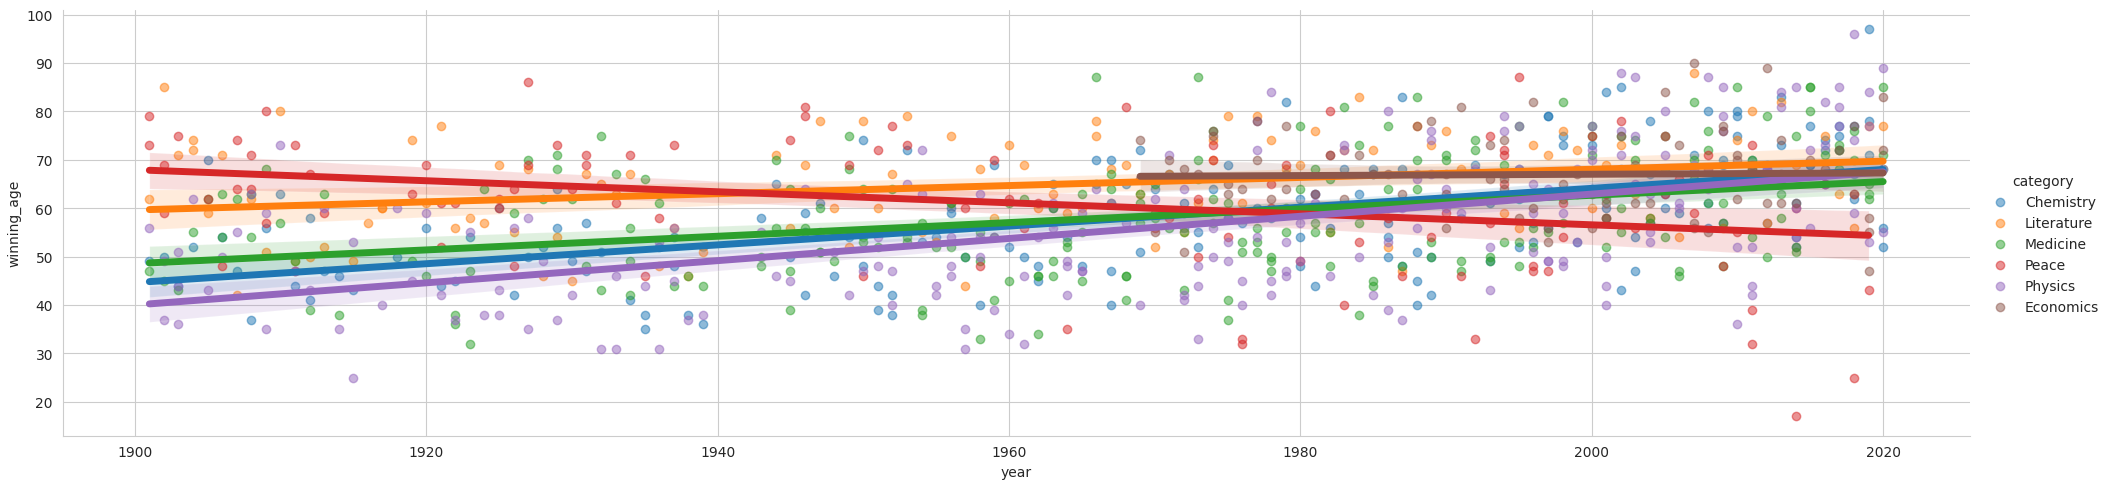

In [1665]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
                hue='category',
                lowess=False,
                aspect=4,
                scatter_kws={'alpha': 0.5},
                line_kws={'linewidth': 5})
    
plt.show()

In [1666]:
print("The is an error here some where the lowess parameter does not work as aspected")

The is an error here some where the lowess parameter does not work as aspected
